In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import nltk
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

print("Setup Complete")

Setup Complete


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.15.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.pipeline import Pipeline

from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize, pos_tag

import logging
from gensim.models import word2vec
from gensim.models.keyedvectors import KeyedVectors

from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda, Embedding
from keras.layers import LSTM, SimpleRNN
from keras.preprocessing.text import Tokenizer
from collections import defaultdict
from keras.layers import Conv1D
from keras import backend as K
from keras.callbacks import EarlyStopping

print("Setup Complete")

Setup Complete


In [ ]:
import pandas as pd
data = pd.read_csv('/content/train_data.csv')
test = pd.read_csv('/content/test_data.csv')
test_prediction = pd.read_csv('/content/test_data_hidden.csv')


In [ ]:
data.head()

name   brand  \
0  All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi...  Amazon   
1        Amazon - Echo Plus w/ Built-In Hub - Silver  Amazon   
2  Amazon Echo Show Alexa-enabled Bluetooth Speak...  Amazon   
3  Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...  Amazon   
4  Brand New Amazon Kindle Fire 16gb 7" Ips Displ...  Amazon   

                                          categories  \
0  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1  Amazon Echo,Smart Home,Networking,Home & Tools...   
2  Amazon Echo,Virtual Assistant Speakers,Electro...   
3  eBook Readers,Fire Tablets,Electronics Feature...   
4  Computers/Tablets & Networking,Tablets & eBook...   

             primaryCategories              reviews.date  \
0                  Electronics  2016-12-26T00:00:00.000Z   
1         Electronics,Hardware  2018-01-17T00:00:00.000Z   
2         Electronics,Hardware  2017-12-20T00:00:00.000Z   
3  Office Supplies,Electronics  2017-08-04T00:00:00.000Z   
4                  Electronics  2017-01-23T00:00:00.000Z   

                                        reviews.text  \
0  Purchased on Black FridayPros - Great Price (e...   
1  I purchased two Amazon in Echo Plus and two do...   
2  Just an average Alexa option. Does show a few ...   
3  very good product. Exactly what I wanted, and ...   
4  This is the 3rd one I've purchased. I've bough...   

              reviews.title sentiment  
0           Powerful tablet  Positive  
1  Amazon Echo Plus AWESOME  Positive  
2                   Average   Neutral  
3               Greattttttt  Positive  
4             Very durable!  Positive

In [ ]:
Positive = data[data['sentiment']== "Positive"].iloc[:,[5,6,7]]
Neutral = data[data['sentiment']== "Neutral"].iloc[:,[5,6,7]]
Negative = data[data['sentiment']== "Negative"].iloc[:,[5,6,7]]

In [ ]:
Positive['sentiment'].value_counts()

sentiment
Positive    3749
Name: count, dtype: int64

In [ ]:
Neutral['sentiment'].value_counts()

sentiment
Neutral    158
Name: count, dtype: int64

In [ ]:
Negative['sentiment'].value_counts()

sentiment
Negative    93
Name: count, dtype: int64

In [ ]:
data1 = data[["sentiment","reviews.text"]]

In [ ]:
data1.head()

sentiment                                       reviews.text
0  Positive  Purchased on Black FridayPros - Great Price (e...
1  Positive  I purchased two Amazon in Echo Plus and two do...
2   Neutral  Just an average Alexa option. Does show a few ...
3  Positive  very good product. Exactly what I wanted, and ...
4  Positive  This is the 3rd one I've purchased. I've bough...

In [ ]:
data1.index = pd.Series(list(range(data1.shape[0])))

In [ ]:
print('Shape : ',data1.shape)
data1.head()

Shape :  (4000, 2)


sentiment                                       reviews.text
0  Positive  Purchased on Black FridayPros - Great Price (e...
1  Positive  I purchased two Amazon in Echo Plus and two do...
2   Neutral  Just an average Alexa option. Does show a few ...
3  Positive  very good product. Exactly what I wanted, and ...
4  Positive  This is the 3rd one I've purchased. I've bough...

In [ ]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
#Download Stopwords
nltk.download('stopwords')

wordnet_lemmatizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'[a-z]+')
stop_words = set(stopwords.words('english'))

def preprocess(document):
    document = document.lower() # Convert to lowercase
    words = tokenizer.tokenize(document) # Tokenize
    words = [w for w in words if not w in stop_words] # Removing stopwords
    # Lemmatizing
    for pos in [wordnet.NOUN, wordnet.VERB,   wordnet.ADJ, wordnet.ADV]:
        words = [wordnet_lemmatizer.lemmatize(x, pos) for x in words]
    return " ".join(words)

print("Setup Complete")

Setup Complete


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data1['Preprocessed_Review'] = data1['reviews.text'].apply(preprocess)

data1.head()

sentiment                                       reviews.text  \
0  Positive  Purchased on Black FridayPros - Great Price (e...   
1  Positive  I purchased two Amazon in Echo Plus and two do...   
2   Neutral  Just an average Alexa option. Does show a few ...   
3  Positive  very good product. Exactly what I wanted, and ...   
4  Positive  This is the 3rd one I've purchased. I've bough...   

                                 Preprocessed_Review  
0  purchase black fridaypros great price even sal...  
1  purchase two amazon echo plus two dot plus fou...  
2  average alexa option show thing screen still l...  
3               good product exactly want good price  
4  rd one purchase buy one niece case compare one...

In [ ]:
data2 = data1[["sentiment","Preprocessed_Review"]]
data2.head()

sentiment                                Preprocessed_Review
0  Positive  purchase black fridaypros great price even sal...
1  Positive  purchase two amazon echo plus two dot plus fou...
2   Neutral  average alexa option show thing screen still l...
3  Positive               good product exactly want good price
4  Positive  rd one purchase buy one niece case compare one...

In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', None)  # Set the option to display full content of each column

# Now print the entire DataFrame or the specific column
print(data2['Preprocessed_Review'])


0                                                                                                                       purchase black fridaypros great price even sale powerful fast quad core processor amaze soundwell builtcons amazon ad amazon need subsidize tablet remove add pay inability access apps except one amazon way able accomplish add google play storenet great tablet money
1       purchase two amazon echo plus two dot plus four fire stick hub philip hue lamp family christmas happy purchase learn much alexa start daily routine alexa program whatever would like include news weather music horoscope also start day compliment think important alexa give best chili recipe mean best call chili want husband use alexa stay organize business date reminder way go
2                                                                                                                                                                                                                                   

In [ ]:
def textPreprocessing(data2):
  #Remove Punctuation Logic
  import string
  removePunctuation = [char for char in data2 if char not in string.punctuation]
  #Join chars to form sentences
  sentenceWithoutPunctuatuons = ''.join(removePunctuation)
  words = sentenceWithoutPunctuatuons.split()
  #StopwordRemoval
  from nltk.corpus import stopwords
  removeStopwords = [word for word in words if word.lower() not in stopwords.words('english')]

  return removeStopwords

In [ ]:
data2.groupby('sentiment').describe()

Preprocessed_Review         \
                        count unique   
sentiment                              
Negative                   93     78   
Neutral                   158    145   
Positive                 3749   3372   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   \
                                                                                                                                                                                                                                                                                                                                                                                                                                                                              top   
sentiment                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
Negative                                                                                                                                                                                         last model kindle hdx terrible purchase model kindle last model great last year replace time problem slot sd card defective give buy new model shut completely try plug external speaker sometimes shut reason go back first year go last year kindle unless make quality phooey   
Neutral                                                                                                                                                                                                                                                                                                                                                                                                                        average alexa option show thing screen still limit   
Positive   buy kindle yr old granddaughter christmas husband kindle several year prior year old grandson love watch play child kind game system use kindle way yr old grandson still play mine love watch tube video play game several game system xbox sega d still us kindle time system husband use time everything internet watch movie show get ready buy grandson new kindle mine bite old crack screen still work good would like one call look gb gb really durable tough   

                
          freq  
sentiment       
Negative     3  
Neutral      2  
Positive     4

In [ ]:
#Text PreProcessing
import pandas as pd

data2['Preprocessed_Review'].head(2).apply(textPreprocessing)

0                                                                                                                                         [purchase, black, fridaypros, great, price, even, sale, powerful, fast, quad, core, processor, amaze, soundwell, builtcons, amazon, ad, amazon, need, subsidize, tablet, remove, add, pay, inability, access, apps, except, one, amazon, way, able, accomplish, add, google, play, storenet, great, tablet, money]
1    [purchase, two, amazon, echo, plus, two, dot, plus, four, fire, stick, hub, philip, hue, lamp, family, christmas, happy, purchase, learn, much, alexa, start, daily, routine, alexa, program, whatever, would, like, include, news, weather, music, horoscope, also, start, day, compliment, think, important, alexa, give, best, chili, recipe, mean, best, call, chili, want, husband, use, alexa, stay, organize, business, date, reminder, way, go]
Name: Preprocessed_Review, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(analyzer=textPreprocessing).fit(data2['Preprocessed_Review'])

In [ ]:
len(bow.vocabulary_)

3407

In [ ]:
reviews_bow = bow.transform(data2['Preprocessed_Review'])

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfData = TfidfTransformer().fit(reviews_bow)
tfidfDataFinal = tfidfData.transform(reviews_bow)

In [ ]:
tfidfDataFinal.shape

(4000, 3407)

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

def analyze_sentiment(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_scores = sid.polarity_scores(text)

    compound_score = sentiment_scores['compound']

    if compound_score >= 0.05:
        sentiment_label = 'Positive'
    elif compound_score > -0.05 and compound_score < 0.05:
        sentiment_label = 'Neutral'
    else:
        sentiment_label = 'Negative'

    return sentiment_label, compound_score

# Example usage with a list of preprocessed reviews
preprocessed_reviews = data2['Preprocessed_Review']

for review in preprocessed_reviews:
    sentiment_label, compound_score = analyze_sentiment(review)
    print(f"Sentiment for '{review}': {sentiment_label}, Compound Score: {compound_score}")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Sentiment for 'purchase black fridaypros great price even sale powerful fast quad core processor amaze soundwell builtcons amazon ad amazon need subsidize tablet remove add pay inability access apps except one amazon way able accomplish add google play storenet great tablet money': Positive, Compound Score: 0.9623
Sentiment for 'purchase two amazon echo plus two dot plus four fire stick hub philip hue lamp family christmas happy purchase learn much alexa start daily routine alexa program whatever would like include news weather music horoscope also start day compliment think important alexa give best chili recipe mean best call chili want husband use alexa stay organize business date reminder way go': Positive, Compound Score: 0.959
Sentiment for 'average alexa option show thing screen still limit': Neutral, Compound Score: 0.0
Sentiment for 'good product exactly want good price': Positive, Compound Score: 0.7269
Sentiment for 'rd one purchase buy one niece case compare one hold protec

KeyboardInterrupt: 

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(tfidfDataFinal,data2['sentiment'])

In [ ]:
model

MultinomialNB()

In [ ]:
inputData = "very bad dont like it at all it sucks"
l1 = textPreprocessing(inputData)
l2 = bow.transform(l1)
l3 = tfidfData.transform(l2)
prediction = model.predict(l3[0])
prediction

array(['Positive'], dtype='<U8')

In [ ]:
#Creating independent and Dependent Features
columns = data2.columns.tolist()
# Filtering the columns to remove data we do not want
columns = [c for c in columns if c not in ["sentiment"]]
# Store the variable we are predicting
target = "sentiment"
# Defining a random state
state = np.random.RandomState(42)
X = data2[columns]
Y = data2[target]
# Printing the shapes of X & Y
print(X.shape)
print(Y.shape)

(4000, 1)
(4000,)


In [ ]:
columns

['Preprocessed_Review']

In [ ]:
print(data2.sentiment.value_counts())

sentiment
Positive    3749
Neutral      158
Negative      93
Name: count, dtype: int64


sentiment
Positive    3749
Neutral      158
Negative      93
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of Reviews Sentiment')

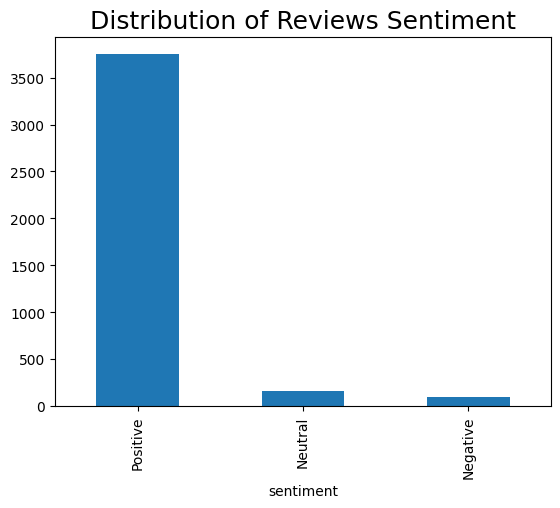

In [ ]:
# Using Matplotlib to show distribution of reviews sentiment in the dataset
print(data1.sentiment.value_counts())
data1['sentiment'].value_counts().plot(kind='bar')
plt.title("Distribution of Reviews Sentiment", size=18)

In [ ]:
print(Positive.shape,Neutral.shape,Negative.shape)

(3749, 3) (158, 3) (93, 3)


In [ ]:
# RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_res,Y_res=ros.fit_resample(X,Y)

In [ ]:
from collections import Counter
print(sorted(Counter(Y_res).items()))

[('Negative', 3749), ('Neutral', 3749), ('Positive', 3749)]


In [ ]:
X_res.shape,Y_res.shape


((11247, 1), (11247,))

In [ ]:
#Checking out both old & new data
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(Y_res)))

Original dataset shape Counter({'Positive': 3749, 'Neutral': 158, 'Negative': 93})
Resampled dataset shape Counter({'Positive': 3749, 'Neutral': 3749, 'Negative': 3749})


In [ ]:
#Creating X output to dataframe
X1=pd.DataFrame(X_res,columns=['Preprocessed_Review'])

In [ ]:
#Creating Y output to dataframe for merging
Y1=pd.DataFrame(Y_res,columns=['sentiment'])

In [ ]:
#Merging the X & Y output to Final data
Final_data=pd.concat([X1,Y1],axis=1)
Final_data.head()

Preprocessed_Review  \
0                                                                                                                  purchase black fridaypros great price even sale powerful fast quad core processor amaze soundwell builtcons amazon ad amazon need subsidize tablet remove add pay inability access apps except one amazon way able accomplish add google play storenet great tablet money   
1  purchase two amazon echo plus two dot plus four fire stick hub philip hue lamp family christmas happy purchase learn much alexa start daily routine alexa program whatever would like include news weather music horoscope also start day compliment think important alexa give best chili recipe mean best call chili want husband use alexa stay organize business date reminder way go   
2                                                                                                                                                                                                                                                                                                                                         average alexa option show thing screen still limit   
3                                                                                                                                                                                                                                                                                                                                                       good product exactly want good price   
4                                                                                                                                                                                                                                                                                                          rd one purchase buy one niece case compare one hold protect tablet many time drop   

  sentiment  
0  Positive  
1  Positive  
2   Neutral  
3  Positive  
4  Positive

In [ ]:
Final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11247 entries, 0 to 11246
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Preprocessed_Review  11247 non-null  object
 1   sentiment            11247 non-null  object
dtypes: object(2)
memory usage: 175.9+ KB


sentiment
Positive    3749
Neutral     3749
Negative    3749
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of Reviews Sentiment')

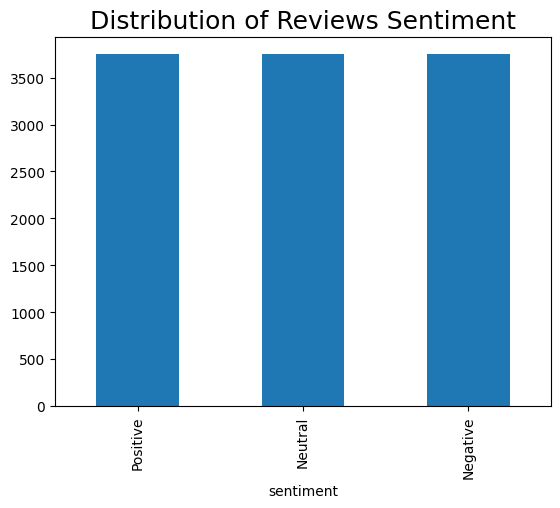

In [ ]:
#@title BALANCING TRAIN DATA
#Using Matplotlib to plot the final data & show distribution of reviews sentiment in the dataset
print(Final_data.sentiment.value_counts())
Final_data['sentiment'].value_counts().plot(kind='bar')
plt.title("Distribution of Reviews Sentiment", size=18)

In [ ]:
Final_data

Preprocessed_Review  \
0                                                                                                                      purchase black fridaypros great price even sale powerful fast quad core processor amaze soundwell builtcons amazon ad amazon need subsidize tablet remove add pay inability access apps except one amazon way able accomplish add google play storenet great tablet money   
1      purchase two amazon echo plus two dot plus four fire stick hub philip hue lamp family christmas happy purchase learn much alexa start daily routine alexa program whatever would like include news weather music horoscope also start day compliment think important alexa give best chili recipe mean best call chili want husband use alexa stay organize business date reminder way go   
2                                                                                                                                                                                                                                                                                                                                             average alexa option show thing screen still limit   
3                                                                                                                                                                                                                                                                                                                                                           good product exactly want good price   
4                                                                                                                                                                                                                                                                                                              rd one purchase buy one niece case compare one hold protect tablet many time drop   
...                                                                                                                                                                                                                                                                                                                                                                                          ...   
11242                                                                                                                                                                                                                                                                                                                                                       neat amazon alexis little feel still   
11243                                                                                                                                                                                                                                                                                                                    buy tablet year old hold good love enjoy playimg game able get internet   
11244                                                                                                                                                                                                                                                                                          fan amazon type operate system tablet end take back want easy supportive game apps android tablet   
11245                                                                                                                                                                                                                                                                                                                                             ok device find google home good promise future   
11246                                                                                            

In [ ]:
#@title BALANCING TEST HIDDEN
import pandas as pd
from sklearn.utils import resample

# Load ground truth labels from CSV file
ground_truth_df = pd.read_csv('/content/test_data_hidden.csv')

# Separate positive and negative sentiment classes
positive_class = ground_truth_df[ground_truth_df['sentiment'] == 'Positive']
negative_class = ground_truth_df[ground_truth_df['sentiment'] == 'Negative']
neutral_class = ground_truth_df[ground_truth_df['sentiment'] == 'Neutral']

# Upsample negative class to balance the dataset
negative_upsampled = resample(negative_class,
                              replace=True,  # sample with replacement to match positive class
                              n_samples=len(positive_class),  # match positive class
                              random_state=42)  # reproducible results

# Upsample negative class to balance the dataset
neutral_upsampled = resample(neutral_class,
                              replace=True,  # sample with replacement to match positive class
                              n_samples=len(positive_class),  # match positive class
                              random_state=42)  # reproducible results

# Combine positive class with upsampled negative class
balanced_df = pd.concat([positive_class, negative_upsampled, neutral_upsampled])

# Save the balanced dataset to a CSV file
balanced_df.to_csv('balanced_test_hidden.csv', index=False)


In [ ]:
# @title CSS - JSS
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'df' is your DataFrame with a 'text' column containing review text
df = Final_data['Preprocessed_Review']

# Define the TfidfVectorizer without specifying the vocabulary
vectorizer = TfidfVectorizer()

# Compute the TF-IDF matrix for the review text
tfidf = vectorizer.fit_transform(df)

# Get the vocabulary
vocabulary = vectorizer.get_feature_names_out()

# Define positive, negative, and neutral words to compute CSS and JSS scores
positive_words = ['good', 'great', 'excellent', 'happy', 'love']
negative_words = ['bad', 'terrible', 'awful', 'sad', 'hate']
neutral_words = ['the', 'and', 'is', 'of', 'to']

# Compute the CSS and JSS scores
css = np.zeros((df.shape[0], 3))
jss = np.zeros((df.shape[0], 3))

for i in range(df.shape[0]):
    for word in positive_words:
        if word in vocabulary:
            index = np.where(vocabulary == word)[0][0]
            css[i, 0] += tfidf[i, index]
            jss[i, 0] += tfidf[i, index]
    for word in negative_words:
        if word in vocabulary:
            index = np.where(vocabulary == word)[0][0]
            css[i, 1] += tfidf[i, index]
            jss[i, 1] += tfidf[i, index]
    for word in neutral_words:
        if word in vocabulary:
            index = np.where(vocabulary == word)[0][0]
            css[i, 2] += tfidf[i, index]
            jss[i, 2] += tfidf[i, index]

# Normalize the CSS and JSS scores
css = css / np.linalg.norm(css, axis=1)[:, None]
jss = jss / np.linalg.norm(jss, axis=1)[:, None]

# Add the CSS and JSS scores to the DataFrame
df['css'] = css.flatten()
df['jss'] = jss.flatten()
print(df[['css', 'jss']])


css    [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, nan, nan, nan, ...
jss    [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, nan, nan, nan, ...
Name: Preprocessed_Review, dtype: object


In [ ]:
# @title VADER
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

def analyze_sentiment(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_scores = sid.polarity_scores(text)

    compound_score = sentiment_scores['compound']

    if compound_score >= 0.05:
        sentiment_label = 'Positive'
    elif compound_score > -0.05 and compound_score < 0.05:
        sentiment_label = 'Neutral'
    else:
        sentiment_label = 'Negative'

    return sentiment_label, compound_score

# Example usage with a list of preprocessed reviews
preprocessed_reviews = Final_data['Preprocessed_Review']

for review in preprocessed_reviews:
    sentiment_label, compound_score = analyze_sentiment(review)
    print(f"Sentiment for '{review}': {sentiment_label}, Compound Score: {compound_score}")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Streaming output truncated to the last 5000 lines.
Sentiment for 'own kid samsung seem confuse navigate also return use samaumg': Negative, Compound Score: -0.2263
Sentiment for 'okay product girlfriend appear us much except steam music question ask get nothing like siri good': Negative, Compound Score: -0.3851
Sentiment for 'first tablet kindle curious update version disappoint': Negative, Compound Score: -0.1027
Sentiment for 'buy product month back slow open app second o different others get normal apps easily one thing say slow slow slow performance know replace need help best buy people know whether get defective piece actual performance': Positive, Compound Score: 0.7506
Sentiment for 'good device child know good': Positive, Compound Score: 0.7003
Sentiment for 'speaker voice quality terrible compare similar size logitech ue boom price high even get promotion': Negative, Compound Score: -0.4767
Sentiment for 'really like echo plus hue light bulb work echo plus buy bridge phillips

In [ ]:
df = Final_data.sample(frac=0.1, random_state=0)

# Dropping missing values
df.dropna(inplace=True)

df.head()

Preprocessed_Review  \
8805   buy think would great read book play game however awkward size make device weird hold generally enjoyable fire hd share exact spec high battery life almost reason take device   
9736                                                                                                                                          good tablet kid lot appts download game   
125                                                                                                                                                    item work expect great product   
10143                                                                                                       great beginner like child limit use many apps allow use google play store   
10937                    buy kindle past time one come defective port bend hard charge still possible come different color gb enough space kid camera ok quality best ok pic take kid   

      sentiment  
8805    Neutral  
9736    Neutral  
125    Positive  
10143   Neutral  
10937   Neutral

In [ ]:
# Splitting data into training set and validation
X_train, X_test, y_train, y_test = train_test_split(df['Preprocessed_Review'], df['sentiment'], \
                                                    test_size=0.1, random_state=0)

print('Load %d training examples and %d validation examples. \n' %(X_train.shape[0],X_test.shape[0]))
print('Show a review in the training set : \n', X_train.iloc[10])

Load 1012 training examples and 113 validation examples. 

Show a review in the training set : 
 daughter love easy navigate hard break


In [ ]:
def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False, \
             ):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html
    letters_only = re.sub("[^a-zA-Z]", " ", text)  # remove non-character
    words = letters_only.lower().split() # convert to lower case

    if remove_stopwords: # remove stopword
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]

    if stemming==True: # stemming
#         stemmer = PorterStemmer()
        stemmer = SnowballStemmer('english')
        words = [stemmer.stem(w) for w in words]

    if split_text==True:  # split text
        return (words)

    return( " ".join(words))

In [ ]:
# Preprocess text data in training set and validation set
X_train_cleaned = []
X_test_cleaned = []

for d in X_train:
    X_train_cleaned.append(cleanText(d))
print('Show a cleaned review in the training set : \n',  X_train_cleaned[10])

for d in X_test:
    X_test_cleaned.append(cleanText(d))

Show a cleaned review in the training set : 
 daughter love easy navigate hard break


In [ ]:
# Fit and transform the training data to a document-term matrix using CountVectorizer
countVect = CountVectorizer()
X_train_countVect = countVect.fit_transform(X_train_cleaned)
print("Number of features: %d \n" % len(countVect.get_feature_names_out()))  # 6378
print("Show some feature names: \n", countVect.get_feature_names_out()[::1000])

# Train MultinomialNB classifier
mnb = MultinomialNB()
mnb.fit(X_train_countVect, y_train)

Number of features: 1511 

Show some feature names: 
 ['ability' 'playtime']


MultinomialNB()

In [ ]:
def modelEvaluation(predictions):
    '''
    Print model evaluation to predicted result
    '''
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test, predictions)))
    #print("\nAUC score : {:.4f}".format(roc_auc_score(y_test, predictions)))
    print("\nClassification report : \n", metrics.classification_report(y_test, predictions))
    print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, predictions))

In [ ]:
# Evaluate the model on validaton set
predictions = mnb.predict(countVect.transform(X_test_cleaned))
modelEvaluation(predictions)


Accuracy on validation set: 0.8938

Classification report : 
               precision    recall  f1-score   support

    Negative       0.93      0.95      0.94        39
     Neutral       0.85      0.90      0.88        39
    Positive       0.91      0.83      0.87        35

    accuracy                           0.89       113
   macro avg       0.89      0.89      0.89       113
weighted avg       0.89      0.89      0.89       113


Confusion Matrix : 
 [[37  0  2]
 [ 3 35  1]
 [ 0  6 29]]


In [ ]:
# Fitting and transforming the training data to a document-term matrix using TfidfVectorizer
tfidf = TfidfVectorizer(min_df=5) #minimum document frequency of 5
X_train_tfidf = tfidf.fit_transform(X_train)
print("Number of features : %d \n" %len(tfidf.get_feature_names_out())) #1722
print("Show some feature names : \n", tfidf.get_feature_names_out()[::1000])

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)

Number of features : 691 

Show some feature names : 
 ['able']


LogisticRegression()

In [ ]:
# Have a look at the top 10 features with the smallest and largest coefficients
feature_names = np.array(tfidf.get_feature_names_out())
sorted_coef_index = lr.coef_[0].argsort()
print('\nTop 10 features with the smallest coefficients:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Top 10 features with the largest coefficients:\n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))



Top 10 features with the smallest coefficients:
['love' 'easy' 'great' 'play' 'read' 'alexa' 'kid' 'price' 'well' 'enjoy']

Top 10 features with the largest coefficients:
['return' 'update' 'bad' 'know' 'terrible' 'th' 'poor' 'try' 'minute'
 'youtube']


In [ ]:
# Evaluating on the validaton set
predictions = lr.predict(tfidf.transform(X_test_cleaned))
modelEvaluation(predictions)


Accuracy on validation set: 0.9292

Classification report : 
               precision    recall  f1-score   support

    Negative       0.93      1.00      0.96        39
     Neutral       0.88      0.92      0.90        39
    Positive       1.00      0.86      0.92        35

    accuracy                           0.93       113
   macro avg       0.94      0.93      0.93       113
weighted avg       0.93      0.93      0.93       113


Confusion Matrix : 
 [[39  0  0]
 [ 3 36  0]
 [ 0  5 30]]


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Splitting review text into parsed sentences using NLTK's punkt tokenizer

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
def parseSent(review, tokenizer, remove_stopwords=False):
    '''
    Parse text into sentences
    '''
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(cleanText(raw_sentence, remove_stopwords, split_text=True))
    return sentences


# Parsing each review in the training set into sentences
sentences = []
for review in X_train_cleaned:
    sentences += parseSent(review, tokenizer)

print('%d parsed sentence in the training set\n'  %len(sentences))
print('Show a parsed sentence in the training set : \n',  sentences[10])

1012 parsed sentence in the training set

Show a parsed sentence in the training set : 
 ['daughter', 'love', 'easy', 'navigate', 'hard', 'break']


In [ ]:
from gensim.models import Word2Vec
w2v = Word2Vec()

In [ ]:
# @title Word2Vec
from gensim.models import Word2Vec
import numpy as np

preprocessed_sentences = Final_data['Preprocessed_Review']

# Define Word2Vec model parameters
num_features = 300  # embedding dimension
min_word_count = 1  # considering all words, adjust if necessary
context = 10  # context window size
downsampling = 1e-3  # downsampling for frequent words

# Train Word2Vec model
print("Training Word2Vec model ...\n")
model = Word2Vec(preprocessed_sentences, vector_size=num_features, window=context, min_count=min_word_count, sample=downsampling)

# Function to compute sentence vector by averaging word vectors
def get_sentence_vector(sentence, model):
    word_vectors = []
    for word in sentence:
        if word in model.wv:
            word_vectors.append(model.wv[word])

    if not word_vectors:
        return None

    return np.mean(word_vectors, axis=0)

# Compute sentence vectors for all sentences
sentence_vectors = []
for sentence in preprocessed_sentences:
    vector = get_sentence_vector(sentence, model)
    if vector is not None:
        sentence_vectors.append(vector)

# Print sentence vectors
for i, vector in enumerate(sentence_vectors):
    print(f"Sentence {i+1} vector:", vector)


Streaming output truncated to the last 5000 lines.
  4.86109406e-02 -3.84078920e-02  6.83318898e-02  5.32990433e-02
  2.38728244e-02 -5.17019145e-02 -2.02624779e-02 -1.61263756e-02
 -2.80744303e-02 -4.22272496e-02 -1.29188448e-02 -1.82480123e-02
 -1.19721284e-02 -8.89465362e-02  3.73482425e-03 -3.37108709e-02
  4.69309315e-02  9.77570862e-02 -6.06162893e-03 -1.30318897e-02
  1.95916612e-02  1.88633557e-02  4.60559502e-02 -5.52871786e-02
  5.59794391e-03  3.46143730e-02  2.32172664e-02  2.08017211e-02
 -8.51799641e-03 -5.46368584e-02 -3.32887098e-02  1.03695318e-01
 -5.49293822e-03  3.22512798e-02  7.12810680e-02 -4.05633412e-02
  7.63555318e-02 -3.29483114e-02 -2.43740343e-02 -7.15442225e-02
  1.61556024e-02 -6.38025552e-02  1.25935562e-02 -5.05250506e-02
  6.32327050e-02 -4.28873897e-02 -1.94726535e-03  2.59564780e-02
  1.69566050e-02  3.91721837e-02  4.29047979e-02 -3.07190474e-02
  1.23497225e-01 -2.28722226e-02  4.70540263e-02  2.47273520e-02
  2.06781980e-02 -5.67801408e-02  2.310

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
  0.02513594  0.06943611  0.03827282 -0.00396679 -0.03203457 -0.03984594
 -0.06394785 -0.01300939 -0.03658206 -0.04600194  0.08668742  0.03704734
 -0.01020627 -0.0394067   0.07628015 -0.00776397  0.01755773  0.02023492
 -0.01438165 -0.02204055 -0.01187732  0.0298011   0.00868564  0.01607558
  0.01857573 -0.02957639 -0.01354047  0.07442516  0.00547528 -0.05603961
  0.01835096 -0.03736049 -0.10948189  0.01329435 -0.00894501 -0.03386147
  0.0730702   0.06711319 -0.05382916  0.00608989  0.03659263  0.03233192
 -0.0434312  -0.08118573  0.05971811 -0.01166227 -0.05073697 -0.01689075
 -0.04883728 -0.04199779 -0.05790878 -0.03482011 -0.04567401 -0.06263022
  0.05936879 -0.00303316  0.02806589  0.02675619  0.01174336  0.00893664
  0.00261333 -0.00215164 -0.0228593  -0.02257322 -0.05414112 -0.02931909
 -0.01180992 -0.09470786 -0.03422155 -0.04069451  0.05009762  0.06715216
  0.01589977  0.01854694  0.04781916  0.00221932  0.06284631 -0.01515562


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
Sentence 2634 vector: [-4.27406281e-02  1.26020074e-01 -6.07944243e-02 -9.55009386e-02
  1.16087068e-02 -4.50900849e-03  3.94544341e-02 -2.67503019e-02
  2.19810363e-02 -3.04637961e-02  7.92193189e-02 -1.50956307e-02
  1.13174040e-02 -2.62053702e-02 -5.09522529e-03 -8.15786421e-02
  1.09326340e-01 -4.56619151e-02 -7.34872278e-03 -1.26496963e-02
  1.60803727e-03 -1.09305894e-02 -6.94371527e-03  8.44138786e-02
 -1.23468690e-01  2.69050933e-02 -5.43994680e-02 -1.44841922e-02
 -5.23510911e-02 -1.24879375e-01  8.51029903e-03  3.32243815e-02
 -5.79120517e-02 -7.93683250e-03  1.59955285e-02  6.38269680e-03
  5.79050295e-02 -1.76091984e-04 -5.70526198e-02  2.01971512e-02
 -3.92722525e-02 -1.70910917e-02  8.31250176e-02 -1.37514379e-02
  5.93298152e-02  2.00849846e-02  7.05732703e-02 -6.53959066e-03
 -2.40282603e-02 -2.57830545e-02 -2.37038936e-02 -3.22666392e-03
  3.65630947e-02 -6.50591624e-04  1.92854553e-02  9.29875765e-03
  3.09595987e-02 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
Sentence 3739 vector: [-0.02246908  0.14536957 -0.03417046 -0.08887801 -0.02253328 -0.01104315
  0.03784741 -0.0532105   0.00662463 -0.00662229  0.10399393  0.00336204
  0.0122654  -0.01954576 -0.01056603 -0.06206559  0.09796543 -0.05582424
 -0.05554048 -0.05858117  0.05432758 -0.01096381  0.0213207   0.07699044
 -0.12237031  0.043745   -0.06029057 -0.03557386 -0.06928331 -0.13062759
 -0.02583947  0.05073411 -0.02255666 -0.02291039  0.0203506   0.01050306
  0.04902045  0.01454798 -0.07620562 -0.00306586 -0.04002295 -0.03395468
  0.08462496 -0.01206646  0.06763346  0.02144706  0.07863879  0.01979577
 -0.04856408  0.00137936 -0.01972881  0.02134108  0.01445393  0.03809714
 -0.01092824 -0.03818061  0.03959307 -0.01005203 -0.1016331  -0.06821811
  0.06880298 -0.06862757 -0.01002746  0.04709386  0.05873208  0.02343902
 -0.04067457  0.03852766 -0.05394899 -0.00226148 -0.03318465 -0.00792666
  0.06764997  0.10105086  0.0259763   0.09132851 -0

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
  0.00532855 -0.03399859  0.07822786 -0.04338497  0.02083705  0.06142154
 -0.02192934 -0.02328277  0.01660039  0.04151836  0.01649484  0.04159291
  0.00279725 -0.03117685  0.00317103  0.03496264 -0.00911794 -0.04975182
  0.04074604 -0.04209219 -0.1009318   0.01303928 -0.02916348 -0.03681863
  0.05950415  0.06776597 -0.05818886  0.06036773  0.03729906  0.0497659
 -0.03243078 -0.08959741  0.08793332 -0.01420557 -0.05485431 -0.01908861
 -0.05440907 -0.06747343 -0.0347974  -0.05465995 -0.0085579  -0.07432383
  0.06888209 -0.03879439  0.04399296  0.05327617  0.00549924 -0.01726887
 -0.01674819 -0.00574851 -0.05483169 -0.02941287 -0.00841839 -0.00735285
 -0.0198354  -0.13959545 -0.02998563 -0.07082947  0.04571813  0.11614607
  0.01765583 -0.00773048  0.0238856   0.00245469  0.04178857  0.00317809
 -0.00878364  0.04269992  0.02273685  0.02289999  0.04136793 -0.06763438
 -0.0368885   0.08369344 -0.01050635 -0.00178595  0.06402083 -0.02533452
 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
  0.01057356 -0.04865639  0.0059653  -0.09413364  0.104096   -0.06257472
 -0.00764761  0.01384558  0.0434134  -0.00367383 -0.00379662  0.06842212
 -0.10539477  0.01653076 -0.07651629  0.02190456 -0.04406127 -0.13572635
 -0.02630922  0.01905733 -0.03757431 -0.00216761  0.04410271  0.01675164
  0.05916979 -0.03819716 -0.06233322  0.0186641  -0.05228516 -0.019632
  0.09434267  0.00088171  0.04075592  0.02092591  0.045843    0.02111158
 -0.05254595 -0.02243017 -0.01520759  0.02267223  0.03670424  0.03336164
  0.00040476  0.00127291  0.07301535  0.03379815 -0.04621935 -0.01461732
  0.06065918 -0.06014634  0.02055075  0.03249924  0.03854676  0.04991421
 -0.02904717  0.06987978 -0.06857722  0.02615831 -0.02935366 -0.01489689
  0.07794057  0.05802755  0.04188313  0.06813405 -0.11432379  0.07282971
 -0.04105714 -0.1219209  -0.06698044  0.04606203 -0.07596009  0.07419525
  0.04442892  0.03788088  0.09213691  0.00623973  0.03401685 -0.01134773
  

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
  6.92733228e-02 -3.01336925e-02  9.60208327e-02  4.91604768e-02
  1.45395510e-02 -3.28637324e-02  2.82994565e-02  5.72082540e-03
 -2.87750531e-02 -3.33883390e-02 -2.32408987e-03 -2.20651757e-02
 -2.03396883e-02 -9.01770443e-02 -4.46069799e-02 -5.59273660e-02
  4.18386012e-02  9.44354758e-02 -1.83052476e-02  1.01816189e-02
  3.32210287e-02 -1.77567382e-03  3.91568169e-02 -4.50794287e-02
  1.43461733e-03  4.08824421e-02  1.29634272e-02  9.39090922e-03
  2.86214352e-02 -5.86966984e-02 -6.39578979e-03  9.09428447e-02
 -2.48979889e-02  3.27480026e-02  9.42004099e-02 -3.60528119e-02
  5.86895943e-02 -5.07611930e-02 -2.28441749e-02 -5.19947372e-02
  2.73310412e-02 -3.46900187e-02  1.07713435e-02 -1.21498741e-02
  6.01951778e-02 -4.51851487e-02 -1.95961483e-02  8.94098822e-03
  8.24878737e-03  1.84669867e-02  7.26708621e-02 -2.52989009e-02
  7.40113482e-02 -1.60570499e-02  5.36362752e-02  5.28353937e-02
 -8.73555429e-03 -5.77773452e-02  2.959

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
 -0.00900607 -0.02667296  0.06154301 -0.02372703  0.00295805  0.04076551
 -0.01483045 -0.00803021  0.00826841  0.02528943  0.03290173  0.01740472
  0.00919791 -0.03401884  0.0131657   0.03227583  0.00321314 -0.05206133
  0.01651294 -0.01615694 -0.10801726 -0.00321378 -0.01331443 -0.05932144
  0.05098183  0.06857732 -0.05122855  0.01685123  0.02978471  0.02394473
 -0.04414064 -0.08553118  0.07402354 -0.01294079 -0.05688413 -0.01254873
 -0.04749512 -0.06112378 -0.04385412 -0.0347864  -0.03667161 -0.05950186
  0.07079586 -0.02286846  0.04481002  0.04492283  0.00874846 -0.00905495
 -0.00831433 -0.01244616 -0.02778642 -0.01571137 -0.00511868 -0.00894731
 -0.01721677 -0.08711814 -0.02924244 -0.04088113  0.0367745   0.08824109
  0.01026814 -0.01547233  0.04399297  0.00720143  0.05208442 -0.01322356
 -0.01256025  0.03805805  0.02675893  0.02064828  0.04101513 -0.04202888
 -0.02728815  0.08859727 -0.01955405  0.00513075  0.06898733 -0.04148023


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
  6.28099740e-02  1.04139827e-01 -6.89017773e-02  9.94098708e-02
 -9.17054862e-02 -2.46685781e-02  3.78988869e-02 -3.97824831e-02
 -8.49923268e-02 -1.25233158e-02  8.88281837e-02  1.53803499e-02
  8.62247590e-03  7.85367787e-02  3.04890852e-02  2.13688500e-02
  7.66227692e-02  1.04111610e-02 -3.31910551e-02 -4.36496399e-02
  1.26535660e-02 -3.98512557e-02  1.45936664e-02  4.77029346e-02
 -6.68810215e-03  6.16967445e-04 -2.14709863e-02  3.58754210e-03
 -2.17779353e-02 -1.63536686e-02 -4.66000922e-02 -4.58973199e-02
  1.65923126e-02 -3.39406403e-03 -5.70748746e-03 -4.77628633e-02
  5.73787503e-02 -1.50583917e-03 -9.12163034e-02  5.15017658e-02
  3.26474309e-02 -5.43054193e-02  5.60353920e-02  5.62922210e-02
  2.43327711e-02  2.68677296e-03 -1.87019035e-02 -2.26113759e-02
 -8.18338990e-02 -3.87837812e-02 -3.54864448e-02 -3.44238095e-02
  8.10986608e-02  5.61570153e-02 -3.57835880e-03 -3.07845455e-02
  1.04567796e-01 -3.20638902e-02  5.356

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
 -2.40292884e-02 -4.33805026e-02 -3.12248059e-02 -6.74044117e-02
  1.10332854e-01  8.30218568e-02 -6.98268488e-02  1.56385094e-01
 -1.07323304e-01 -1.82529967e-02 -1.16593447e-02 -3.59675996e-02
 -8.34870040e-02  3.86380008e-03  8.15622061e-02 -1.45855816e-02
  7.12746801e-03  4.93687205e-02  7.93338418e-02 -1.39135998e-02
  5.41661233e-02  1.59008242e-02 -2.80632004e-02 -8.22743122e-03
  3.49916741e-02 -1.68815460e-02 -3.52399820e-03  4.83972877e-02
  1.41019281e-03  1.85946822e-02 -3.88075374e-02 -2.34189108e-02
 -2.10702233e-02  1.81677548e-04 -7.35105872e-02 -3.50253396e-02
  2.79868450e-02 -5.58471959e-03 -9.25011840e-03 -3.83688621e-02
  8.12207088e-02 -6.71934411e-02 -1.46290198e-01  3.40651013e-02
  4.44506779e-02 -6.54870793e-02  4.60890532e-02  8.90584663e-02
  1.05448132e-02 -4.26250771e-02 -2.10408382e-02 -1.67397838e-02
 -1.33857727e-01 -7.52752945e-02 -3.27024013e-02 -1.92044601e-02
  1.14800222e-01  7.40362937e-03  2.390

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
  0.05484725 -0.04004816  0.01741046 -0.11221349  0.14764914 -0.10499045
 -0.00104787 -0.01238967  0.04713741  0.00094711  0.00708063  0.08829209
 -0.11848883  0.03515805 -0.11418348  0.02574403 -0.05330776 -0.12628685
 -0.01293519  0.05767766 -0.07163476 -0.03065254  0.03978411  0.02417575
  0.04582977 -0.04775323 -0.08832683  0.01061179 -0.06102007 -0.01446132
  0.11327341 -0.00249886  0.05199431  0.03997156  0.05718582  0.0060647
 -0.1078995  -0.06787399  0.0143284   0.02723701 -0.00067413  0.00220602
 -0.02919174 -0.02708223  0.03266734  0.05662778 -0.0742399  -0.04191491
  0.04934308 -0.03882438  0.04964982  0.05363306  0.03675242  0.04888674
  0.00401366  0.08839267 -0.08531183  0.03439882 -0.01061722 -0.01522042
  0.0623711   0.0901204   0.0295676   0.07207722 -0.1531927   0.11830685
 -0.02659133 -0.1219587  -0.05788684  0.04776113 -0.06475586  0.09140467
  0.0581584   0.0375264   0.14234194  0.03520652  0.03415079 -0.00905152
 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 [-2.90301684e-02  1.09642215e-01 -4.51221615e-02 -9.82161239e-02
 -1.06369862e-02 -2.52876747e-02  1.42982239e-02 -4.28508362e-03
 -7.91533676e-04 -1.19209997e-02  8.80438238e-02  1.32974545e-02
 -1.62492339e-02 -4.86650644e-03  1.42853465e-02 -7.82889053e-02
  1.06766991e-01 -4.96024452e-02 -3.67152616e-02 -5.56270313e-03
  7.17948005e-02 -9.40397207e-04  5.23526222e-02  8.64047334e-02
 -1.02404706e-01  4.21047397e-03 -6.65419251e-02  3.14839650e-03
 -3.50737236e-02 -1.22319706e-01 -4.29798886e-02  3.04593910e-02
 -2.64301673e-02  1.27361147e-02  2.81110723e-02  3.63826342e-02
  2.78720744e-02  4.09298250e-03 -7.14896992e-02  2.22626552e-02
 -1.81484260e-02 -1.50511265e-02  8.51535872e-02  1.44651178e-02
  4.53791395e-02  3.32525149e-02  4.84987870e-02  4.89278371e-03
 -4.15442176e-02 -1.47852786e-02 -7.56243570e-03 -1.42481783e-02
  2.58451980e-02  2.30959933e-02 -2.33706720e-02 -1.45077519e-02
  3.92295979e-02  6.47268258e-03 -4.51532863e-02 -5.46491593e-02
  3.70291919e-02 -4.3883

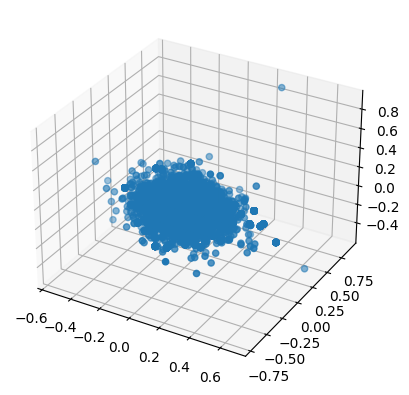

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from gensim.models import Word2Vec

# Assuming sentence_vectors contains the computed sentence vectors

# Reduce dimensionality to 3 dimensions using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
sentence_vectors_3d = pca.fit_transform(sentence_vectors)

# Plot in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(sentence_vectors_3d[:, 0], sentence_vectors_3d[:, 1], sentence_vectors_3d[:, 2])

plt.show()

In [ ]:
# @title Doc2Vec
import numpy as np
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Sample product reviews (each review consists of multiple sentences)
product_reviews = Final_data['Preprocessed_Review']

# Preprocess the product reviews and assign tags
tagged_reviews = [TaggedDocument(review.split(), [i]) for i, review in enumerate(product_reviews)]

# Train Doc2Vec model on product review text
model = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=20)
model.build_vocab(tagged_reviews)
model.train(tagged_reviews, total_examples=model.corpus_count, epochs=model.epochs)

# Get embeddings for product reviews
review_embeddings = [model.infer_vector(review.words) for review in tagged_reviews]

# Print the vector representations for each sentence
for i, review_embedding in enumerate(review_embeddings):
    print(f"Review {i+1} Embedding:")
    print(review_embedding)
    print()


Streaming output truncated to the last 5000 lines.
 -0.04526915  0.02503435  0.01421984 -0.03918341 -0.01020509 -0.03020719
  0.01517009  0.04418503  0.04319411 -0.07303945  0.01752515 -0.01294916
 -0.09398168  0.06184969  0.04170713 -0.02983205 -0.08797286  0.06222849
  0.0549031  -0.0241942  -0.01911726 -0.0464705  -0.21418647  0.18472488
 -0.01359064  0.03117285 -0.08544757  0.07751904 -0.06687915  0.02066221
  0.04827093  0.03417639  0.17696774  0.12036175 -0.06983099  0.02104626
 -0.07744034  0.09398839 -0.03062504  0.06020891 -0.04064016  0.10620378
 -0.0620827  -0.00933022  0.01174035  0.03846039  0.0920446   0.05303789
  0.10867461  0.00807696 -0.08189961 -0.00870946  0.19932832  0.04555835
  0.03809626 -0.11130656  0.07970332 -0.12042899]

Review 11009 Embedding:
[-1.27276331e-02  3.74415293e-02 -2.59506982e-02 -5.96064217e-02
  2.97934711e-02 -1.85439795e-01 -2.98176650e-02  1.72232524e-01
 -1.72479466e-01 -4.42571752e-02 -7.09538311e-02 -2.52022058e-01
  1.05767004e-01  8.59

In [ ]:
def makeFeatureVec(review, model, num_features):
    # Function to average all of the word vectors in a given paragraph

    # Initialize an empty numpy array (for speed)
    featureVec = np.zeros((num_features,), dtype="float32")
    nwords = 0.

    # Loop over each word in the review and, if it is in the model's vocabulary, add its feature vector to the total
    for word in review:
        if word in model.wv.index_to_key:
            nwords += 1.
            featureVec = np.add(featureVec, model.wv[word])

    # Divide the result by the number of words to get the average
    if nwords > 0:
        featureVec = np.divide(featureVec, nwords)
    return featureVec

def getAvgFeatureVecs(reviews, model, num_features):
    # Transform all reviews to feature vectors using makeFeatureVec()
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews), num_features), dtype="float32")
    for review in reviews:
        reviewFeatureVecs[counter] = makeFeatureVec(review, model, num_features)
        counter += 1
    return reviewFeatureVecs


In [ ]:
# Getting feature vectors for training set
X_train_cleaned = []
for review in X_train:
    X_train_cleaned.append(cleanText(review, remove_stopwords=True, split_text=True))

# Use w2v.wv.index_to_key instead of w2v.wv.index2word
trainVector = getAvgFeatureVecs(X_train_cleaned, w2v, num_features)
print("Training set: %d feature vectors with %d dimensions" % trainVector.shape)

# Getting feature vectors for validation set
X_test_cleaned = []
for review in X_test:
    X_test_cleaned.append(cleanText(review, remove_stopwords=True, split_text=True))
testVector = getAvgFeatureVecs(X_test_cleaned, w2v, num_features)
print("Validation set: %d feature vectors with %d dimensions" % testVector.shape)


Training set: 1012 feature vectors with 300 dimensions
Validation set: 113 feature vectors with 300 dimensions


In [ ]:
# @title CNN - BiLSTM
import numpy as np
from gensim.models import Word2Vec
from nltk.sentiment import SentimentIntensityAnalyzer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, Bidirectional, LSTM, Dense, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Word2Vec parameters
num_features = 300
min_word_count = 10
num_workers = 4
context = 10
downsampling = 1e-3

# Training Word2Vec model
print("Training Word2Vec model ...\n")
w2v = Word2Vec(sentences, workers=num_workers, vector_size=num_features, min_count=min_word_count, \
               window=context, sample=downsampling)
w2v.init_sims(replace=True)

# VADER sentiment analysis method
def analyze_sentiment_with_vader(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_scores = sid.polarity_scores(text)
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score > -0.05 and compound_score < 0.05:
        return 'Neutral'
    else:
        return 'Negative'


# Tokenize and pad sequences for input to the hybrid model
max_sequence_length = 20  # Adjust as needed

# Convert reviews to sequences using Keras Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_reviews)
sequences = tokenizer.texts_to_sequences(preprocessed_reviews)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post', truncating='post')

# One-hot encode the sentiment labels
labels = [1 if analyze_sentiment_with_vader(review) == 'Positive' else 0 for review in preprocessed_reviews]
labels = np.array(labels)  # Convert to NumPy array

# Build hybrid CNN-BiLSTM model for binary classification
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=num_features, input_length=max_sequence_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification, using sigmoid activation

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
num_epochs = 10  # Adjust as needed
epoch_accuracies = []

for epoch in range(num_epochs):
    model.fit(padded_sequences, labels, epochs=1, batch_size=64)  # Train for 1 epoch
    evaluation_result = model.evaluate(padded_sequences, labels)
    epoch_accuracy = evaluation_result[1]
    epoch_accuracies.append(epoch_accuracy)
    print(f"Accuracy on epoch {epoch + 1}: {epoch_accuracy}")

# Calculate mean accuracy for all epochs
final_total_accuracy = np.mean(epoch_accuracies) * 100
print(f"\nFinal Total Accuracy: {final_total_accuracy:.2f}%")

# Make predictions on new data
test_data = pd.read_csv('/content/test_data.csv')
new_data = test_data['reviews.text']
sequences_new = tokenizer.texts_to_sequences(new_data)
padded_sequences_new = pad_sequences(sequences_new, maxlen=max_sequence_length, padding='post', truncating='post')
predictions = model.predict(padded_sequences_new)

# Threshold for classification (adjust as needed)
classification_threshold = 0.5
binary_predictions = [1 if pred > classification_threshold else 0 for pred in predictions]

# Print predictions
for data, prediction in zip(new_data, binary_predictions):
    sentiment_label = 'Positive' if prediction == 1 else 'Negative'
    print(f"Predicted sentiment for '{data}': {sentiment_label}")



Training Word2Vec model ...

352/352 [==============================] - 6s 16ms/step - loss: 0.0287 - accuracy: 0.9923
Accuracy on epoch 1: 0.9922646284103394
352/352 [==============================] - 6s 18ms/step - loss: 0.0106 - accuracy: 0.9976
Accuracy on epoch 2: 0.9975993633270264
352/352 [==============================] - 6s 17ms/step - loss: 0.0042 - accuracy: 0.9990
Accuracy on epoch 3: 0.9990219473838806
352/352 [==============================] - 5s 14ms/step - loss: 0.0011 - accuracy: 0.9997
Accuracy on epoch 4: 0.9997332692146301
352/352 [==============================] - 5s 14ms/step - loss: 1.7421e-04 - accuracy: 1.0000
Accuracy on epoch 5: 1.0
352/352 [==============================] - 5s 15ms/step - loss: 7.8720e-04 - accuracy: 0.9997
Accuracy on epoch 6: 0.9997332692146301
352/352 [==============================] - 5s 15ms/step - loss: 0.0034 - accuracy: 0.9988
Accuracy on epoch 7: 0.9987552165985107
352/352 [==============================] - 5s 15ms/step - loss: 1.91

In [ ]:
# @title RNN - BiLSTM
import numpy as np
from gensim.models import Word2Vec
from nltk.sentiment import SentimentIntensityAnalyzer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Word2Vec parameters
num_features = 300
min_word_count = 10
num_workers = 4
context = 10
downsampling = 1e-3

# Training Word2Vec model
print("Training Word2Vec model ...\n")
w2v = Word2Vec(sentences, workers=num_workers, vector_size=num_features, min_count=min_word_count, \
               window=context, sample=downsampling)
w2v.init_sims(replace=True)

# VADER sentiment analysis method
def analyze_sentiment_with_vader(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_scores = sid.polarity_scores(text)
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score > -0.05 and compound_score < 0.05:
        return 'Neutral'
    else:
        return 'Negative'

# Tokenize and pad sequences for input to the hybrid model
max_sequence_length = 20  # Adjust as needed

# Convert reviews to sequences using Keras Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_reviews)
sequences = tokenizer.texts_to_sequences(preprocessed_reviews)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post', truncating='post')

# One-hot encode the sentiment labels
labels = [1 if analyze_sentiment_with_vader(review) == 'Positive' else 0 for review in preprocessed_reviews]
labels = np.array(labels)  # Convert to NumPy array

# Build hybrid RNN-BiLSTM model for binary classification
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=num_features, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification, using sigmoid activation

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
num_epochs = 10  # Adjust as needed
epoch_accuracies = []

for epoch in range(num_epochs):
    model.fit(padded_sequences, labels, epochs=1, batch_size=64)  # Train for 1 epoch
    evaluation_result = model.evaluate(padded_sequences, labels)
    epoch_accuracy = evaluation_result[1]
    epoch_accuracies.append(epoch_accuracy)
    print(f"Accuracy on epoch {epoch + 1}: {epoch_accuracy}")

# Calculate mean accuracy for all epochs
final_total_accuracy = np.mean(epoch_accuracies) * 100
print(f"\nFinal Total Accuracy: {final_total_accuracy:.2f}%")

# Make predictions on new data
test_data = pd.read_csv('/content/test_data.csv')
new_data = test_data['reviews.text']
sequences_new = tokenizer.texts_to_sequences(new_data)
padded_sequences_new = pad_sequences(sequences_new, maxlen=max_sequence_length, padding='post', truncating='post')
predictions = model.predict(padded_sequences_new)

# Threshold for classification (adjust as needed)
classification_threshold = 0.5
binary_predictions = [1 if pred > classification_threshold else 0 for pred in predictions]

# Print predictions
for data, prediction in zip(new_data, binary_predictions):
    sentiment_label = 'Positive' if prediction == 1 else 'Negative'
    print(f"Predicted sentiment for '{data}': {sentiment_label}")


Training Word2Vec model ...



352/352 [==============================] - 7s 18ms/step - loss: 0.0304 - accuracy: 0.9929
Accuracy on epoch 1: 0.992887020111084
352/352 [==============================] - 8s 22ms/step - loss: 0.0093 - accuracy: 0.9980
Accuracy on epoch 2: 0.9979550242424011
352/352 [==============================] - 6s 18ms/step - loss: 0.0023 - accuracy: 0.9994
Accuracy on epoch 3: 0.9993776082992554
352/352 [==============================] - 8s 22ms/step - loss: 0.0080 - accuracy: 0.9979
Accuracy on epoch 4: 0.9978660941123962
352/352 [==============================] - 8s 22ms/step - loss: 3.5843e-04 - accuracy: 1.0000
Accuracy on epoch 5: 1.0
352/352 [==============================] - 7s 19ms/step - loss: 3.1006e-04 - accuracy: 1.0000
Accuracy on epoch 6: 1.0
352/352 [==============================] - 6s 18ms/step - loss: 5.7322e-04 - accuracy: 0.9998
Accuracy on epoch 7: 0.999822199344635
352/352 [==============================] - 6s 18ms/step - loss: 2.2659e-04 - accuracy: 0.9999
Accuracy on epoc

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Load your dataset
#train = pd.read_csv('/content/train_data.csv')

# Split the dataset into features (X) and labels (y)
X = Final_data['Preprocessed_Review']
y_true = Final_data['sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.2, random_state=42)

# Assuming you use a simple TF-IDF and SVM model for sentiment analysis
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

model = SVC(kernel='linear')
model.fit(X_train_vectorized, y_train)

# Predict the labels on the test set
y_pred = model.predict(X_test_vectorized)

# Additional classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       748
     Neutral       0.97      1.00      0.98       733
    Positive       1.00      0.97      0.98       769

    accuracy                           0.99      2250
   macro avg       0.99      0.99      0.99      2250
weighted avg       0.99      0.99      0.99      2250



In [ ]:
# @title IGSO
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences

# PSO parameters
num_stars = 10
num_iterations = 10
pct_copy = 0.3

# Other parameters
num_features = 300
max_sequence_length = 20

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=max_sequence_length))  # Update input_dim
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# PSO Function
def pso_optimization(model, num_stars, num_iterations, fitness_function, pct_copy, max_sequence_length):
    # PSO Initialization
    stars = [np.random.rand(num_features) for _ in range(num_stars)]
    global_best = max(stars, key=lambda star: fitness_function(model, star, max_sequence_length))

    # PSO Main Loop
    for _ in range(num_iterations):
        for i, star in enumerate(stars):
            # PSO Update
            r1, r2 = np.random.rand(2)
            cognitive = r1 * (star - star)
            social = r2 * (global_best - star)
            star = star + cognitive + social

            # Ensure star has the correct shape for the model input
            star_for_model = np.zeros((1, num_features))
            star_for_model[0, :len(star)] = star

            # Apply the star to your model for training
            sequences = pad_sequences(star_for_model, maxlen=max_sequence_length, padding='post', truncating='post')
            model.fit(sequences, np.array([1]), epochs=1, batch_size=1, verbose=0)

            # Recalculate fitness
            fitness = fitness_function(model, star, max_sequence_length)

            # Update global best
            if fitness > fitness_function(model, global_best, max_sequence_length):
                global_best = np.copy(star)

        # Create a new set of stars for the next iteration
        new_stars = []
        for star in stars:
            if np.random.rand() < pct_copy:
                new_stars.append(np.copy(star))
            else:
                new_stars.append(np.random.rand(num_features))

        # Update the population with the new set of stars
        stars = new_stars

    # Flatten the best solution weights
    best_solution = np.concatenate([layer.flatten() for layer in model.get_weights()])

    # Extract only the first 13 values from the best solution
    best_solution = best_solution[:13]

    return best_solution

def fitness_function(model, star, max_sequence_length):
    # Ensure star has the correct shape for the model input
    star_for_model = np.zeros((1, num_features))
    star_for_model[0, :len(star)] = star

    # Apply the star to your model for prediction
    sequences = pad_sequences(star_for_model, maxlen=max_sequence_length, padding='post', truncating='post')
    predictions = model.predict(sequences)
    binary_predictions = np.round(predictions).astype(int)  # Ensure binary predictions are integers
    accuracy = np.mean(binary_predictions.flatten() == [1])  # Assuming binary classification

    return accuracy

# PSO optimization
best_solution = pso_optimization(model, num_stars, num_iterations, fitness_function, pct_copy, max_sequence_length)

# Save the best solution's weights
np.save('optimization.npy', best_solution)

# Print the best solution
print(f"Best Solution: {best_solution}")


1/1 [==============================] - 0s 20ms/step
Best Solution: [ 0.20055777 -0.02426803 -0.14366761  0.19907486 -0.24572685 -0.04879382
  0.24850735 -0.16585054 -0.18450457  0.14079869  0.06832725 -0.02656087
  0.04979658]


In [ ]:
# @title WOA
import numpy as np

# Define the objective function to be minimized
def objective_function(x):
    return np.sum(x**2)  # Example objective function (sum of squares)

# WOA parameters
max_iterations = 100  # Maximum number of iterations
population_size = 20  # Number of whales in the population
dimension = 5         # Dimension of the problem (number of decision variables)
a = 2                 # Parameter 'a' in WOA (defines the spiral shape)
a_max = 2             # Maximum value for 'a'

# Initialization
population = np.random.uniform(low=-5, high=5, size=(population_size, dimension))  # Randomly initialize population

# Main optimization loop
for iteration in range(max_iterations):
    for i in range(population_size):
        # Update a value
        r1 = np.random.random()
        r2 = np.random.random()
        A = 2 * a * r1 - a
        C = 2 * r2

        # Update position of the whale
        D = np.abs(C * population[i] - population[np.random.randint(population_size)])
        new_position = population[i] - A * D

        # Boundary handling (if necessary)
        new_position = np.clip(new_position, -5, 5)  # Example bounds (-5 to 5)

        # Calculate objective function value for the new position
        new_fitness = objective_function(new_position)

        # Update population if the new position is better
        if new_fitness < objective_function(population[i]):
            population[i] = new_position

        # Update parameter a
        a = a_max - (iteration / max_iterations) * (a_max - 0.1)  # Linearly decrease 'a'

# Find the best solution in the final population
best_solution = population[np.argmin([objective_function(x) for x in population])]

# Print the best solution found
print("Best solution found:", best_solution)
print("Objective function value:", objective_function(best_solution))


Best solution found: [-0.03539497 -0.17737273  0.06087748  0.07482913 -0.06164506]
Objective function value: 0.04581947132670509


In [ ]:
# @title ABC
import numpy as np

# Define the objective function to be optimized
def objective_function(x):
    return sum(x**2)

# Initialize the parameters
num_iterations = 100  # Number of iterations
num_employed_bees = 20  # Number of employed bees (solutions)
num_onlooker_bees = 20  # Number of onlooker bees
num_dimensions = 10  # Number of dimensions in the search space
lb = -5  # Lower bound of the search space
ub = 5  # Upper bound of the search space

# Initialize the population
population = np.random.uniform(lb, ub, size=(num_employed_bees, num_dimensions))
fitness = np.zeros(num_employed_bees)

# Evaluate the fitness of the initial population
for i in range(num_employed_bees):
    fitness[i] = objective_function(population[i])

# ABC main loop
for iteration in range(num_iterations):
    # Employed bee phase
    for i in range(num_employed_bees):
        # Select a solution to modify
        k = np.random.randint(num_employed_bees)
        while k == i:
            k = np.random.randint(num_employed_bees)

        # Choose a dimension to modify
        dim = np.random.randint(num_dimensions)

        # Generate a new solution based on the waggle dance
        new_solution = population[i].copy()
        phi = np.random.uniform(-1, 1)
        new_solution[dim] = population[i][dim] + phi * (population[i][dim] - population[k][dim])

        # Apply boundary constraints
        new_solution[dim] = np.clip(new_solution[dim], lb, ub)

        # Evaluate the fitness of the new solution
        new_fitness = objective_function(new_solution)

        # Perform greedy selection
        if new_fitness < fitness[i]:
            population[i] = new_solution
            fitness[i] = new_fitness

    # Onlooker bee phase
    total_fitness = np.sum(fitness)
    probabilities = fitness / total_fitness  # Normalize probabilities
    for i in range(num_onlooker_bees):
        # Select a solution based on roulette wheel selection
        selected_index = np.random.choice(num_employed_bees, p=probabilities)

        # Choose a dimension to modify
        dim = np.random.randint(num_dimensions)

        # Generate a new solution based on the waggle dance
        new_solution = population[selected_index].copy()
        k = np.random.randint(num_employed_bees)
        while k == selected_index:
            k = np.random.randint(num_employed_bees)
        phi = np.random.uniform(-1, 1)
        new_solution[dim] = population[selected_index][dim] + phi * (population[selected_index][dim] - population[k][dim])

        # Apply boundary constraints
        new_solution[dim] = np.clip(new_solution[dim], lb, ub)

        # Evaluate the fitness of the new solution
        new_fitness = objective_function(new_solution)

        # Perform greedy selection
        if new_fitness < fitness[selected_index]:
            population[selected_index] = new_solution
            fitness[selected_index] = new_fitness

    # Scout bee phase (random exploration)
    for i in range(num_employed_bees):
        if np.random.rand() < 0.01:  # Probability of scout bee phase
            population[i] = np.random.uniform(lb, ub, size=num_dimensions)
            fitness[i] = objective_function(population[i])

    # Print the best solution in current iteration
    best_index = np.argmin(fitness)
    print("Iteration {}: Best Fitness = {:.6f}".format(iteration+1, fitness[best_index]))

# Print the final best solution
best_index = np.argmin(fitness)
print("\nFinal Best Solution:")
print("Fitness = {:.6f}".format(fitness[best_index]))
print("Solution =", population[best_index])


Iteration 1: Best Fitness = 35.405475
Iteration 2: Best Fitness = 35.405475
Iteration 3: Best Fitness = 33.614085
Iteration 4: Best Fitness = 33.614085
Iteration 5: Best Fitness = 27.631530
Iteration 6: Best Fitness = 27.631530
Iteration 7: Best Fitness = 27.427406
Iteration 8: Best Fitness = 22.110560
Iteration 9: Best Fitness = 22.110560
Iteration 10: Best Fitness = 21.251715
Iteration 11: Best Fitness = 15.800203
Iteration 12: Best Fitness = 15.800203
Iteration 13: Best Fitness = 15.800203
Iteration 14: Best Fitness = 15.800203
Iteration 15: Best Fitness = 15.800203
Iteration 16: Best Fitness = 15.661845
Iteration 17: Best Fitness = 13.990101
Iteration 18: Best Fitness = 13.431170
Iteration 19: Best Fitness = 10.171704
Iteration 20: Best Fitness = 5.824832
Iteration 21: Best Fitness = 5.824832
Iteration 22: Best Fitness = 5.824832
Iteration 23: Best Fitness = 4.069553
Iteration 24: Best Fitness = 4.069553
Iteration 25: Best Fitness = 4.058114
Iteration 26: Best Fitness = 3.994830
It

In [ ]:
# @title CSS - JSS - IGSO - CNN - BiLSTM
import numpy as np
from gensim.models import Word2Vec
from nltk.sentiment import SentimentIntensityAnalyzer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, Bidirectional, LSTM, Dense, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd

# Define fitness function
def fitness_function(model, star, max_sequence_length, sequences, labels):
    # Ensure star has the correct shape for the model input
    star_for_model = np.zeros((1, num_features))
    star_for_model[0, :len(star)] = star

    # Apply the star to your model for training
    sequences = pad_sequences(star_for_model, maxlen=max_sequence_length, padding='post', truncating='post')
    model.fit(sequences, labels, epochs=1, batch_size=1, verbose=0)

    # Recalculate fitness
    evaluation_result = model.evaluate(sequences, labels)
    fitness = evaluation_result[1]
    return fitness

# Define PSO optimization function
def pso_optimization(model, num_stars, num_iterations, fitness_function, pct_copy, max_sequence_length, sequences):
    # Define fitness function
    def fitness_function(model, star, max_sequence_length, sequences):
        # Ensure star has the correct shape for the model input
        star_for_model = np.zeros((1, num_features))
        star_for_model[0, :len(star)] = star

        # Apply the star to your model for training
        sequences = pad_sequences(star_for_model, maxlen=max_sequence_length, padding='post', truncating='post')
        model.fit(sequences, np.array([1]), epochs=1, batch_size=1, verbose=0)

        # Recalculate fitness
        evaluation_result = model.evaluate(sequences, np.array([1]))
        fitness = evaluation_result[1]
        return fitness

    # PSO Initialization
    stars = [np.random.rand(num_features) for _ in range(num_stars)]
    global_best = max(stars, key=lambda star: fitness_function(model, star, max_sequence_length, sequences))

    # PSO Main Loop
    for _ in range(num_iterations):
        for i, star in enumerate(stars):
            # PSO Update
            r1, r2 = np.random.rand(2)
            cognitive = r1 * (star - star)
            social = r2 * (global_best - star)
            star = star + cognitive + social

            # Recalculate fitness
            fitness = fitness_function(model, star, max_sequence_length, sequences)

            # Update global best
            if fitness > fitness_function(model, global_best, max_sequence_length, sequences):
                global_best = np.copy(star)

        # Create a new set of stars for the next iteration
        new_stars = []
        for star in stars:
            if np.random.rand() < pct_copy:
                new_stars.append(np.copy(star))
            else:
                new_stars.append(np.random.rand(num_features))

        # Update the population with the new set of stars
        stars = new_stars

# Word2Vec parameters
num_features = 300
min_word_count = 10
num_workers = 4
context = 10
downsampling = 1e-3

# PSO parameters
num_stars = 10
num_iterations = 10
pct_copy = 0.3

# Other parameters
max_sequence_length = 20

preprocessed_reviews = Final_data['Preprocessed_Review']
# Training Word2Vec model
print("Training Word2Vec model ...\n")
w2v = Word2Vec(sentences, workers=num_workers, vector_size=num_features, min_count=min_word_count, \
               window=context, sample=downsampling)

# CSS and JSS sentiment analysis method
def analyze_sentiment_with_css_jss(text):
    # Assuming 'df' is your DataFrame with a 'text' column containing review text
    df = pd.DataFrame({'text': [text]})

    # Define the TfidfVectorizer without specifying the vocabulary
    vectorizer = TfidfVectorizer()

    # Compute the TF-IDF matrix for the review text
    tfidf = vectorizer.fit_transform(df['text'])

    # Get the vocabulary
    vocabulary = vectorizer.get_feature_names_out()

    # Define positive, negative, and neutral words to compute CSS and JSS scores
    positive_words = ['good', 'great', 'excellent', 'happy', 'love']
    negative_words = ['bad', 'terrible', 'awful', 'sad', 'hate']
    neutral_words = ['the', 'and', 'is', 'of', 'to']

    # Compute the CSS and JSS scores
    css = np.zeros((df.shape[0], 3))
    jss = np.zeros((df.shape[0], 3))

    for i in range(df.shape[0]):
        for word in positive_words:
            if word in vocabulary:
                index = np.where(vocabulary == word)[0][0]
                css[i, 0] += tfidf[i, index]
                jss[i, 0] += tfidf[i, index]
        for word in negative_words:
            if word in vocabulary:
                index = np.where(vocabulary == word)[0][0]
                css[i, 1] += tfidf[i, index]
                jss[i, 1] += tfidf[i, index]
        for word in neutral_words:
            if word in vocabulary:
                index = np.where(vocabulary == word)[0][0]
                css[i, 2] += tfidf[i, index]
                jss[i, 2] += tfidf[i, index]

    # Normalize the CSS and JSS scores
    css = css / np.linalg.norm(css, axis=1)[:, None]
    jss = jss / np.linalg.norm(jss, axis=1)[:, None]

    return css.flatten(), jss.flatten()

# Tokenize and pad sequences for input to the hybrid model
# Convert reviews to sequences using Keras Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_reviews)
sequences = tokenizer.texts_to_sequences(preprocessed_reviews)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post', truncating='post')

# One-hot encode the sentiment labels
labels = [1 if analyze_sentiment_with_css_jss(review) == 'Positive' else 0 for review in preprocessed_reviews]
labels = np.array(labels)  # Convert to NumPy array

# Build hybrid CNN-BiLSTM model for binary classification
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=num_features, input_length=max_sequence_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification, using sigmoid activation

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# PSO optimization
pso_optimization(model, num_stars, num_iterations, fitness_function, pct_copy, max_sequence_length, padded_sequences)

# Train the model
num_epochs = 10  # Adjust as needed
epoch_accuracies = []

for epoch in range(num_epochs):
    model.fit(padded_sequences, labels, epochs=1, batch_size=64)  # Train for 1 epoch
    evaluation_result = model.evaluate(padded_sequences, labels)
    epoch_accuracy = evaluation_result[1]
    epoch_accuracies.append(epoch_accuracy)
    print(f"Accuracy on epoch {epoch + 1}: {epoch_accuracy}")

# Calculate mean accuracy for all epochs
final_total_accuracy = np.mean(epoch_accuracies) * 100
print(f"\nFinal Total Accuracy: {final_total_accuracy:.2f}%")

# Make predictions on new data
# Assuming '/content/test_data.csv' is the path to your test data CSV file
test_data = pd.read_csv('/content/test_data.csv')
new_data = test_data['reviews.text']
sequences_new = tokenizer.texts_to_sequences(new_data)
padded_sequences_new = pad_sequences(sequences_new, maxlen=max_sequence_length, padding='post', truncating='post')
predictions = model.predict(padded_sequences_new)

# Threshold for classification (adjust as needed)
classification_threshold = 0.5
binary_predictions = [1 if pred > classification_threshold else 0 for pred in predictions]

# Print predictions
for data, prediction in zip(new_data, binary_predictions):
    sentiment_label = 'Positive' if prediction == 1 else 'Negative'
    print(f"Predicted sentiment for '{data}': {sentiment_label}")


Training Word2Vec model ...

352/352 [==============================] - 6s 18ms/step - loss: 7.6291e-08 - accuracy: 1.0000
Accuracy on epoch 1: 1.0
352/352 [==============================] - 6s 17ms/step - loss: 7.5876e-08 - accuracy: 1.0000
Accuracy on epoch 2: 1.0
352/352 [==============================] - 6s 16ms/step - loss: 7.5375e-08 - accuracy: 1.0000
Accuracy on epoch 3: 1.0
352/352 [==============================] - 5s 14ms/step - loss: 7.4794e-08 - accuracy: 1.0000
Accuracy on epoch 4: 1.0
352/352 [==============================] - 5s 14ms/step - loss: 7.4134e-08 - accuracy: 1.0000
Accuracy on epoch 5: 1.0
352/352 [==============================] - 5s 15ms/step - loss: 7.3399e-08 - accuracy: 1.0000
Accuracy on epoch 6: 1.0
352/352 [==============================] - 5s 14ms/step - loss: 7.2582e-08 - accuracy: 1.0000
Accuracy on epoch 7: 1.0
352/352 [==============================] - 5s 15ms/step - loss: 7.1697e-08 - accuracy: 1.0000
Accuracy on epoch 8: 1.0
352/352 [==========

In [ ]:
# @title IGSO - CNN - BiLSTM
# Import necessary libraries
import numpy as np
from gensim.models import Word2Vec
from nltk.sentiment import SentimentIntensityAnalyzer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, Bidirectional, LSTM, Dense, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd

# Define PSO optimization function
def pso_optimization(model, num_stars, num_iterations, fitness_function, pct_copy, max_sequence_length, sequences):
    # Define fitness function
    def fitness_function(model, star, max_sequence_length, sequences):
        # Ensure star has the correct shape for the model input
        star_for_model = np.zeros((1, num_features))
        star_for_model[0, :len(star)] = star

        # Apply the star to your model for training
        sequences = pad_sequences(star_for_model, maxlen=max_sequence_length, padding='post', truncating='post')
        model.fit(sequences, np.array([1]), epochs=1, batch_size=1, verbose=0)

        # Recalculate fitness
        evaluation_result = model.evaluate(sequences, np.array([1]))
        fitness = evaluation_result[1]
        return fitness

    # PSO Initialization
    stars = [np.random.rand(num_features) for _ in range(num_stars)]
    global_best = max(stars, key=lambda star: fitness_function(model, star, max_sequence_length, sequences))

    # PSO Main Loop
    for _ in range(num_iterations):
        for i, star in enumerate(stars):
            # PSO Update
            r1, r2 = np.random.rand(2)
            cognitive = r1 * (star - star)
            social = r2 * (global_best - star)
            star = star + cognitive + social

            # Recalculate fitness
            fitness = fitness_function(model, star, max_sequence_length, sequences)

            # Update global best
            if fitness > fitness_function(model, global_best, max_sequence_length, sequences):
                global_best = np.copy(star)

        # Create a new set of stars for the next iteration
        new_stars = []
        for star in stars:
            if np.random.rand() < pct_copy:
                new_stars.append(np.copy(star))
            else:
                new_stars.append(np.random.rand(num_features))

        # Update the population with the new set of stars
        stars = new_stars

# Word2Vec parameters
num_features = 300
min_word_count = 10
num_workers = 4
context = 10
downsampling = 1e-3

# PSO parameters
num_stars = 10
num_iterations = 10
pct_copy = 0.3

# Other parameters
max_sequence_length = 20

# Training Word2Vec model
print("Training Word2Vec model ...\n")
w2v = Word2Vec(sentences, workers=num_workers, vector_size=num_features, min_count=min_word_count, \
               window=context, sample=downsampling)

# VADER sentiment analysis method
def analyze_sentiment_with_vader(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_scores = sid.polarity_scores(text)
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score > -0.05 and compound_score < 0.05:
        return 'Neutral'
    else:
        return 'Negative'

# Tokenize and pad sequences for input to the hybrid model
# Convert reviews to sequences using Keras Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_reviews)
sequences = tokenizer.texts_to_sequences(preprocessed_reviews)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post', truncating='post')

# One-hot encode the sentiment labels
labels = [1 if analyze_sentiment_with_vader(review) == 'Positive' else 0 for review in preprocessed_reviews]
labels = np.array(labels)  # Convert to NumPy array

# Build hybrid CNN-BiLSTM model for binary classification
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=num_features, input_length=max_sequence_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification, using sigmoid activation

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# PSO optimization
pso_optimization(model, num_stars, num_iterations, fitness_function, pct_copy, max_sequence_length, padded_sequences)

# Train the model
num_epochs = 10  # Adjust as needed
epoch_accuracies = []

for epoch in range(num_epochs):
    model.fit(padded_sequences, labels, epochs=1, batch_size=64)  # Train for 1 epoch
    evaluation_result = model.evaluate(padded_sequences, labels)
    epoch_accuracy = evaluation_result[1]
    epoch_accuracies.append(epoch_accuracy)
    print(f"Accuracy on epoch {epoch + 1}: {epoch_accuracy}")

# Calculate mean accuracy for all epochs
final_total_accuracy = np.mean(epoch_accuracies) * 100
print(f"\nFinal Total Accuracy: {final_total_accuracy:.2f}%")


Training Word2Vec model ...

352/352 [==============================] - 8s 23ms/step - loss: 0.0262 - accuracy: 0.9935
Accuracy on epoch 1: 0.9935093522071838
352/352 [==============================] - 6s 17ms/step - loss: 0.0083 - accuracy: 0.9982
Accuracy on epoch 2: 0.998221755027771
352/352 [==============================] - 6s 17ms/step - loss: 0.0018 - accuracy: 0.9998
Accuracy on epoch 3: 0.999822199344635
352/352 [==============================] - 5s 13ms/step - loss: 3.5185e-04 - accuracy: 0.9999
Accuracy on epoch 4: 0.9999110698699951
352/352 [==============================] - 6s 16ms/step - loss: 1.2857e-04 - accuracy: 1.0000
Accuracy on epoch 5: 1.0
352/352 [==============================] - 5s 14ms/step - loss: 5.2505e-05 - accuracy: 1.0000
Accuracy on epoch 6: 1.0
352/352 [==============================] - 6s 17ms/step - loss: 3.1178e-05 - accuracy: 1.0000
Accuracy on epoch 7: 1.0
352/352 [==============================] - 5s 13ms/step - loss: 2.2525e-05 - accuracy: 1.000

In [ ]:
# Make predictions on new data
# Assuming '/content/test_data.csv' is the path to your test data CSV file
test_data = pd.read_csv('/content/balanced_test_hidden.csv')
new_data = test_data['reviews.text']
sequences_new = tokenizer.texts_to_sequences(new_data)
padded_sequences_new = pad_sequences(sequences_new, maxlen=max_sequence_length, padding='post', truncating='post')
predictions = model.predict(padded_sequences_new)
3
# Threshold for classification (adjust as needed)
classification_threshold = 0.5
binary_predictions = [1 if pred > classification_threshold else 0 for pred in predictions]

# Print predictions
for data, prediction in zip(new_data, binary_predictions):
    sentiment_label = 'Positive' if prediction == 1 else 'Negative'
    print(f"Predicted sentiment for '{data}': {sentiment_label}")

In [ ]:
# Import necessary libraries
import numpy as np
from gensim.models import Word2Vec
from nltk.sentiment import SentimentIntensityAnalyzer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, Bidirectional, LSTM, Dense, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd

# Define PSO optimization function
def pso_optimization(model, num_stars, num_iterations, fitness_function, pct_copy, max_sequence_length, sequences, hyperparameters):
    # Extract hyperparameters
    num_filters, num_units = hyperparameters['num_filters'], hyperparameters['num_units']

    # Define fitness function
    def fitness_function(model, star, max_sequence_length, sequences, num_filters, num_units):
        # Update model hyperparameters
        model.layers[1].filters = num_filters
        model.layers[2].units = num_units

        # Ensure star has the correct shape for the model input
        star_for_model = np.zeros((1, num_features))
        star_for_model[0, :len(star)] = star

        # Apply the star to your model for training
        sequences = pad_sequences(star_for_model, maxlen=max_sequence_length, padding='post', truncating='post')
        model.fit(sequences, np.array([1]), epochs=1, batch_size=1, verbose=0)

        # Recalculate fitness
        evaluation_result = model.evaluate(sequences, np.array([1]))
        fitness = evaluation_result[1]
        return fitness

    # PSO Initialization
    stars = [np.random.rand(num_features) for _ in range(num_stars)]
    global_best = max(stars, key=lambda star: fitness_function(model, star, max_sequence_length, sequences, num_filters, num_units))

    # PSO Main Loop
    for _ in range(num_iterations):
        for i, star in enumerate(stars):
            # PSO Update
            r1, r2 = np.random.rand(2)
            cognitive = r1 * (star - star)
            social = r2 * (global_best - star)
            star = star + cognitive + social

            # Recalculate fitness
            fitness = fitness_function(model, star, max_sequence_length, sequences, num_filters, num_units)

            # Update global best
            if fitness > fitness_function(model, global_best, max_sequence_length, sequences, num_filters, num_units):
                global_best = np.copy(star)

        # Create a new set of stars for the next iteration
        new_stars = []
        for star in stars:
            if np.random.rand() < pct_copy:
                new_stars.append(np.copy(star))
            else:
                new_stars.append(np.random.rand(num_features))

        # Update the population with the new set of stars
        stars = new_stars

# Word2Vec parameters
num_features = 300
min_word_count = 10
num_workers = 4
context = 10
downsampling = 1e-3

# PSO parameters
num_stars = 10
num_iterations = 10
pct_copy = 0.3

# Other parameters
max_sequence_length = 20

# Training Word2Vec model
print("Training Word2Vec model ...\n")
w2v = Word2Vec(sentences, workers=num_workers, vector_size=num_features, min_count=min_word_count, \
               window=context, sample=downsampling)

# VADER sentiment analysis method
def analyze_sentiment_with_vader(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_scores = sid.polarity_scores(text)
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score > -0.05 and compound_score < 0.05:
        return 'Neutral'
    else:
        return 'Negative'

# Tokenize and pad sequences for input to the hybrid model
# Convert reviews to sequences using Keras Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_reviews)
sequences = tokenizer.texts_to_sequences(preprocessed_reviews)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post', truncating='post')

# One-hot encode the sentiment labels
labels = [1 if analyze_sentiment_with_vader(review) == 'Positive' else 0 for review in preprocessed_reviews]
labels = np.array(labels)  # Convert to NumPy array

# Build hybrid CNN-BiLSTM model for binary classification
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=num_features, input_length=max_sequence_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification, using sigmoid activation

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# PSO optimization
hyperparameters = {'num_filters': 128, 'num_units': 64}  # Initial hyperparameters
pso_optimization(model, num_stars, num_iterations, fitness_function, pct_copy, max_sequence_length, padded_sequences, hyperparameters)

# Train the model
num_epochs = 10  # Adjust as needed
epoch_accuracies = []

for epoch in range(num_epochs):
    model.fit(padded_sequences, labels, epochs=1, batch_size=64)  # Train for 1 epoch
    evaluation_result = model.evaluate(padded_sequences, labels)
    epoch_accuracy = evaluation_result[1]
    epoch_accuracies.append(epoch_accuracy)
    print(f"Accuracy on epoch {epoch + 1}: {epoch_accuracy}")

# Calculate mean accuracy for all epochs
final_total_accuracy = np.mean(epoch_accuracies) * 100
print(f"\nFinal Total Accuracy: {final_total_accuracy:.2f}%")

# PREDICTING IGSO ON TEST HIDDEN
# Define the predicted sentiments and reviews
predicted_sentiments = []
predicted_reviews = []  # Assuming 'new_data' contains the reviews

# Assuming '/content/test_data.csv' is the path to your test data CSV file
test_data = pd.read_csv('/content/balanced_test_hidden.csv')
new_data = test_data['reviews.text']
sequences_new = tokenizer.texts_to_sequences(new_data)
padded_sequences_new = pad_sequences(sequences_new, maxlen=max_sequence_length, padding='post', truncating='post')
predictions = model.predict(padded_sequences_new)

# Threshold for classification (adjust as needed)
classification_threshold = 0.5

# Classify sentiments based on predicted probabilities
for pred in predictions:
    if pred > classification_threshold:
        predicted_sentiments.append('Positive')
    elif pred < (1 - classification_threshold):
        predicted_sentiments.append('Negative')
    else:
        predicted_sentiments.append('Neutral')

# Store predicted reviews
predicted_reviews = new_data.tolist()

# Create a DataFrame for predicted reviews and sentiments
predicted_df = pd.DataFrame({'Review': predicted_reviews, 'Sentiment': predicted_sentiments})

# Save the DataFrame to a CSV file
predicted_df.to_csv('/content/predicted_reviews_igso.csv', index=False)

# CLASSIFICATION REPORT - IGSO
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Load ground truth labels from CSV file
ground_truth_df = pd.read_csv('/content/balanced_test_hidden.csv')

# Extract the 'Sentiment' column to obtain ground truth labels
ground_truth = ground_truth_df['sentiment']

# Read the predicted reviews with sentiments from the Excel file
predicted_df = pd.read_csv('/content/predicted_reviews_igso.csv')

# Extract predicted sentiments
predicted_labels = predicted_df['Sentiment']

# Calculate precision, recall, and F1 score
precision = precision_score(ground_truth, predicted_labels, average='weighted')
recall = recall_score(ground_truth, predicted_labels, average='weighted')
f1 = f1_score(ground_truth, predicted_labels, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate classification report
class_report = classification_report(ground_truth, predicted_labels)

# Print classification report
print(class_report)


Training Word2Vec model ...



KeyboardInterrupt: 

In [ ]:
#@title CLASSIFICATION REPORT - IGSO
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

# Load ground truth labels from CSV file
ground_truth_df = pd.read_csv('/content/balanced_test_hidden.csv')

# Extract the 'Sentiment' column to obtain ground truth labels
ground_truth = ground_truth_df['sentiment']

# Read the predicted reviews with sentiments from the Excel file
predicted_df = pd.read_csv('/content/predicted_reviews_igso.csv')

# Extract predicted sentiments
predicted_labels = predicted_df['Sentiment']

# Calculate precision, recall, and F1 score
precision = precision_score(ground_truth, predicted_labels, average='weighted')
recall = recall_score(ground_truth, predicted_labels, average='weighted')
f1 = f1_score(ground_truth, predicted_labels, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate classification report
class_report = classification_report(ground_truth, predicted_labels)

# Print classification report
print(class_report)

Precision: 0.33884372177055105
Recall: 0.44112415510494485
F1 Score: 0.34752901986721557
              precision    recall  f1-score   support

    Negative       0.63      0.41      0.50       937
     Neutral       0.00      0.00      0.00       937
    Positive       0.39      0.91      0.55       937

    accuracy                           0.44      2811
   macro avg       0.34      0.44      0.35      2811
weighted avg       0.34      0.44      0.35      2811



In [ ]:
# @title IGSO - CNN - BiLSTM
# Import necessary libraries
import numpy as np
from gensim.models import Word2Vec
from nltk.sentiment import SentimentIntensityAnalyzer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, Bidirectional, LSTM, Dense, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd

# Define PSO optimization function
def pso_optimization(model, num_stars, num_iterations, fitness_function, pct_copy, max_sequence_length, sequences):
    # Define fitness function
    def fitness_function(model, star, max_sequence_length, sequences):
        # Ensure star has the correct shape for the model input
        star_for_model = np.zeros((1, num_features))
        star_for_model[0, :len(star)] = star

        # Apply the star to your model for training
        sequences = pad_sequences(star_for_model, maxlen=max_sequence_length, padding='post', truncating='post')
        model.fit(sequences, np.array([1]), epochs=1, batch_size=1, verbose=0)

        # Recalculate fitness
        evaluation_result = model.evaluate(sequences, np.array([1]))
        fitness = evaluation_result[1]
        return fitness

    # PSO Initialization
    stars = [np.random.rand(num_features) for _ in range(num_stars)]
    global_best = max(stars, key=lambda star: fitness_function(model, star, max_sequence_length, sequences))

    # PSO Main Loop
    for _ in range(num_iterations):
        for i, star in enumerate(stars):
            # PSO Update
            r1, r2 = np.random.rand(2)
            cognitive = r1 * (star - star)
            social = r2 * (global_best - star)
            star = star + cognitive + social

            # Recalculate fitness
            fitness = fitness_function(model, star, max_sequence_length, sequences)

            # Update global best
            if fitness > fitness_function(model, global_best, max_sequence_length, sequences):
                global_best = np.copy(star)

        # Create a new set of stars for the next iteration
        new_stars = []
        for star in stars:
            if np.random.rand() < pct_copy:
                new_stars.append(np.copy(star))
            else:
                new_stars.append(np.random.rand(num_features))

        # Update the population with the new set of stars
        stars = new_stars

# Word2Vec parameters
num_features = 300
min_word_count = 10
num_workers = 4
context = 10
downsampling = 1e-3

# PSO parameters
num_stars = 10
num_iterations = 10
pct_copy = 0.3

# Other parameters
max_sequence_length = 20

# Training Word2Vec model
print("Training Word2Vec model ...\n")
w2v = Word2Vec(sentences, workers=num_workers, vector_size=num_features, min_count=min_word_count, \
               window=context, sample=downsampling)

# VADER sentiment analysis method
def analyze_sentiment_with_vader(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_scores = sid.polarity_scores(text)
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score > -0.05 and compound_score < 0.05:
        return 'Neutral'
    else:
        return 'Negative'

# Tokenize and pad sequences for input to the hybrid model
# Convert reviews to sequences using Keras Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_reviews)
sequences = tokenizer.texts_to_sequences(preprocessed_reviews)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post', truncating='post')

# One-hot encode the sentiment labels
labels = [1 if analyze_sentiment_with_vader(review) == 'Positive' else 0 for review in preprocessed_reviews]
labels = np.array(labels)  # Convert to NumPy array

# Build hybrid CNN-BiLSTM model for binary classification
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=num_features, input_length=max_sequence_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification, using sigmoid activation

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# PSO optimization
pso_optimization(model, num_stars, num_iterations, fitness_function, pct_copy, max_sequence_length, padded_sequences)

# Train the model
num_epochs = 10  # Adjust as needed
epoch_accuracies = []

for epoch in range(num_epochs):
    model.fit(padded_sequences, labels, epochs=1, batch_size=64)  # Train for 1 epoch
    evaluation_result = model.evaluate(padded_sequences, labels)
    epoch_accuracy = evaluation_result[1]
    epoch_accuracies.append(epoch_accuracy)
    print(f"Accuracy on epoch {epoch + 1}: {epoch_accuracy}")

# Calculate mean accuracy for all epochs
final_total_accuracy = np.mean(epoch_accuracies) * 100
print(f"\nFinal Total Accuracy: {final_total_accuracy:.2f}%")

# @title PREDICTING IGSO ON TEST HIDDEN
# Define the predicted sentiments and reviews
predicted_sentiments = []
predicted_reviews = []  # Assuming 'new_data' contains the reviews

# Assuming '/content/test_data.csv' is the path to your test data CSV file
test_data = pd.read_csv('/content/balanced_test_hidden.csv')
new_data = test_data['reviews.text']
sequences_new = tokenizer.texts_to_sequences(new_data)
padded_sequences_new = pad_sequences(sequences_new, maxlen=max_sequence_length, padding='post', truncating='post')
predictions = model.predict(padded_sequences_new)

# Threshold for classification (adjust as needed)
classification_threshold = 0.5

# Classify sentiments based on predicted probabilities
for pred in predictions:
    if pred > classification_threshold:
        predicted_sentiments.append('Positive')
    elif pred < (1 - classification_threshold):
        predicted_sentiments.append('Negative')
    else:
        predicted_sentiments.append('Neutral')

# Store predicted reviews
predicted_reviews = new_data.tolist()

# Create a DataFrame for predicted reviews and sentiments
predicted_df = pd.DataFrame({'Review': predicted_reviews, 'Sentiment': predicted_sentiments})

# Save the DataFrame to a CSV file
predicted_df.to_csv('/content/predicted_reviews_igso.csv', index=False)

# @title CLASSIFICATION REPORT - IGSO
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Load ground truth labels from CSV file
ground_truth_df = pd.read_csv('/content/balanced_test_hidden.csv')

# Extract the 'Sentiment' column to obtain ground truth labels
ground_truth = ground_truth_df['sentiment']

# Read the predicted reviews with sentiments from the Excel file
predicted_df = pd.read_csv('/content/predicted_reviews_igso.csv')

# Extract predicted sentiments
predicted_labels = predicted_df['Sentiment']

# Calculate precision, recall, and F1 score
precision = precision_score(ground_truth, predicted_labels, average='weighted')
recall = recall_score(ground_truth, predicted_labels, average='weighted')
f1 = f1_score(ground_truth, predicted_labels, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate classification report
class_report = classification_report(ground_truth, predicted_labels)

# Print classification report
print(class_report)


Training Word2Vec model ...

352/352 [==============================] - 4s 13ms/step - loss: 0.0271 - accuracy: 0.9940
Accuracy on epoch 1: 0.9940428733825684
352/352 [==============================] - 5s 13ms/step - loss: 0.0058 - accuracy: 0.9977
Accuracy on epoch 2: 0.9976882934570312
352/352 [==============================] - 5s 13ms/step - loss: 9.1316e-04 - accuracy: 0.9998
Accuracy on epoch 3: 0.999822199344635
352/352 [==============================] - 5s 14ms/step - loss: 4.1713e-04 - accuracy: 0.9999
Accuracy on epoch 4: 0.9999110698699951
352/352 [==============================] - 5s 13ms/step - loss: 1.7322e-04 - accuracy: 0.9999
Accuracy on epoch 5: 0.9999110698699951
352/352 [==============================] - 5s 13ms/step - loss: 3.2603e-05 - accuracy: 1.0000
Accuracy on epoch 6: 1.0
352/352 [==============================] - 5s 15ms/step - loss: 2.1610e-05 - accuracy: 1.0000
Accuracy on epoch 7: 1.0
352/352 [==============================] - 5s 14ms/step - loss: 1.6598e-

In [ ]:
# @title D2V - IGSO - CNN - BiLSTM
# Import necessary libraries
import numpy as np
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.sentiment import SentimentIntensityAnalyzer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, Bidirectional, LSTM, Dense, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd

# Define PSO optimization function
def pso_optimization(model, num_stars, num_iterations, pct_copy, max_sequence_length, sequences):
    # Define fitness function
    def fitness_function(model, star, max_sequence_length, sequences):
        # Ensure star has the correct shape for the model input
        star_for_model = np.zeros((1, num_features))
        star_for_model[0, :len(star)] = star

        # Apply the star to your model for training
        sequences = pad_sequences(star_for_model, maxlen=max_sequence_length, padding='post', truncating='post')
        model.fit(sequences, np.array([1]), epochs=1, batch_size=1, verbose=0)

        # Recalculate fitness
        evaluation_result = model.evaluate(sequences, np.array([1]))
        fitness = evaluation_result[1]
        return fitness

    # PSO Initialization
    stars = [np.random.rand(num_features) for _ in range(num_stars)]
    global_best = max(stars, key=lambda star: fitness_function(model, star, max_sequence_length, sequences))

    # PSO Main Loop
    for _ in range(num_iterations):
        for i, star in enumerate(stars):
            # PSO Update
            r1, r2 = np.random.rand(2)
            cognitive = r1 * (star - star)
            social = r2 * (global_best - star)
            star = star + cognitive + social

            # Recalculate fitness
            fitness = fitness_function(model, star, max_sequence_length, sequences)

            # Update global best
            if fitness > fitness_function(model, global_best, max_sequence_length, sequences):
                global_best = np.copy(star)

        # Create a new set of stars for the next iteration
        new_stars = []
        for star in stars:
            if np.random.rand() < pct_copy:
                new_stars.append(np.copy(star))
            else:
                new_stars.append(np.random.rand(num_features))

        # Update the population with the new set of stars
        stars = new_stars

# Doc2Vec parameters
num_features = 300
min_word_count = 10
num_workers = 4
context = 10
downsampling = 1e-3

# PSO parameters
num_stars = 10
num_iterations = 10
pct_copy = 0.3

# Other parameters
max_sequence_length = 20

# Tag documents for Doc2Vec
tagged_documents = [TaggedDocument(words=doc.split(), tags=[str(i)]) for i, doc in enumerate(preprocessed_reviews)]

# Training Doc2Vec model
print("Training Doc2Vec model ...\n")
doc2vec_model = Doc2Vec(tagged_documents, vector_size=num_features, window=context, min_count=min_word_count, workers=num_workers)

# VADER sentiment analysis method (unchanged)
def analyze_sentiment_with_vader(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_scores = sid.polarity_scores(text)
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score > -0.05 and compound_score < 0.05:
        return 'Neutral'
    else:
        return 'Negative'

# Tokenize and pad sequences for input to the hybrid model (unchanged)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_reviews)
sequences = tokenizer.texts_to_sequences(preprocessed_reviews)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post', truncating='post')

# One-hot encode the sentiment labels (unchanged)
labels = [1 if analyze_sentiment_with_vader(review) == 'Positive' else 0 for review in preprocessed_reviews]
labels = np.array(labels)  # Convert to NumPy array

# Build hybrid CNN-BiLSTM model for binary classification (unchanged)
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=num_features, input_length=max_sequence_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification, using sigmoid activation

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# PSO optimization (unchanged)
pso_optimization(model, num_stars, num_iterations, pct_copy, max_sequence_length, padded_sequences)

# Train the model (unchanged)
num_epochs = 10  # Adjust as needed
epoch_accuracies = []

for epoch in range(num_epochs):
    model.fit(padded_sequences, labels, epochs=1, batch_size=64)  # Train for 1 epoch
    evaluation_result = model.evaluate(padded_sequences, labels)
    epoch_accuracy = evaluation_result[1]
    epoch_accuracies.append(epoch_accuracy)
    print(f"Accuracy on epoch {epoch + 1}: {epoch_accuracy}")

# Calculate mean accuracy for all epochs (unchanged)
final_total_accuracy = np.mean(epoch_accuracies) * 100
print(f"\nFinal Total Accuracy: {final_total_accuracy:.2f}%")

# @title PREDICTING IGSO ON TEST HIDDEN
# Define the predicted sentiments and reviews
predicted_sentiments = []
predicted_reviews = []  # Assuming 'new_data' contains the reviews

# Assuming '/content/test_data.csv' is the path to your test data CSV file
test_data = pd.read_csv('/content/balanced_test_hidden.csv')
new_data = test_data['reviews.text']
sequences_new = tokenizer.texts_to_sequences(new_data)
padded_sequences_new = pad_sequences(sequences_new, maxlen=max_sequence_length, padding='post', truncating='post')
predictions = model.predict(padded_sequences_new)

# Threshold for classification (adjust as needed)
classification_threshold = 0.5

# Classify sentiments based on predicted probabilities
for pred in predictions:
    if pred > classification_threshold:
        predicted_sentiments.append('Positive')
    elif pred < (1 - classification_threshold):
        predicted_sentiments.append('Negative')
    else:
        predicted_sentiments.append('Neutral')

# Store predicted reviews
predicted_reviews = new_data.tolist()

# Create a DataFrame for predicted reviews and sentiments
predicted_df = pd.DataFrame({'Review': predicted_reviews, 'Sentiment': predicted_sentiments})

# Save the DataFrame to a CSV file
predicted_df.to_csv('/content/predicted_reviews_d2vigso.csv', index=False)

# @title CLASSIFICATION REPORT - IGSO
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Load ground truth labels from CSV file
ground_truth_df = pd.read_csv('/content/balanced_test_hidden.csv')

# Extract the 'Sentiment' column to obtain ground truth labels
ground_truth = ground_truth_df['sentiment']

# Read the predicted reviews with sentiments from the Excel file
predicted_df = pd.read_csv('/content/predicted_reviews_d2vigso.csv')

# Extract predicted sentiments
predicted_labels = predicted_df['Sentiment']

# Calculate precision, recall, and F1 score
precision = precision_score(ground_truth, predicted_labels, average='weighted')
recall = recall_score(ground_truth, predicted_labels, average='weighted')
f1 = f1_score(ground_truth, predicted_labels, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate classification report
class_report = classification_report(ground_truth, predicted_labels)

# Print classification report
print(class_report)



Training Doc2Vec model ...

352/352 [==============================] - 5s 13ms/step - loss: 0.0277 - accuracy: 0.9924
Accuracy on epoch 1: 0.9924424290657043
352/352 [==============================] - 5s 13ms/step - loss: 0.0073 - accuracy: 0.9986
Accuracy on epoch 2: 0.9985774159431458
352/352 [==============================] - 5s 13ms/step - loss: 0.0010 - accuracy: 1.0000
Accuracy on epoch 3: 1.0
352/352 [==============================] - 5s 13ms/step - loss: 5.4653e-04 - accuracy: 0.9998
Accuracy on epoch 4: 0.999822199344635
352/352 [==============================] - 5s 13ms/step - loss: 7.5212e-05 - accuracy: 1.0000
Accuracy on epoch 5: 1.0
352/352 [==============================] - 5s 14ms/step - loss: 4.6340e-05 - accuracy: 1.0000
Accuracy on epoch 6: 1.0
352/352 [==============================] - 5s 14ms/step - loss: 3.2622e-05 - accuracy: 1.0000
Accuracy on epoch 7: 1.0
352/352 [==============================] - 6s 16ms/step - loss: 2.4351e-05 - accuracy: 1.0000
Accuracy on e

In [ ]:
# @title IGSO - RNN - BiLSTM
import numpy as np
from gensim.models import Word2Vec
from nltk.sentiment import SentimentIntensityAnalyzer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, SimpleRNN, LSTM, Dense, GlobalMaxPooling1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd

# Define PSO optimization function
def pso_optimization(model, num_stars, num_iterations, fitness_function, pct_copy, max_sequence_length, sequences):
    # Define fitness function
    def fitness_function(model, star, max_sequence_length, sequences):
        # Ensure star has the correct shape for the model input
        star_for_model = np.zeros((1, num_features))
        star_for_model[0, :len(star)] = star

        # Apply the star to your model for training
        sequences = pad_sequences(star_for_model, maxlen=max_sequence_length, padding='post', truncating='post')
        model.fit(sequences, np.array([1]), epochs=1, batch_size=1, verbose=0)

        # Recalculate fitness
        evaluation_result = model.evaluate(sequences, np.array([1]))
        fitness = evaluation_result[1]
        return fitness

    # PSO Initialization
    stars = [np.random.rand(num_features) for _ in range(num_stars)]
    global_best = max(stars, key=lambda star: fitness_function(model, star, max_sequence_length, sequences))

    # PSO Main Loop
    for _ in range(num_iterations):
        for i, star in enumerate(stars):
            # PSO Update
            r1, r2 = np.random.rand(2)
            cognitive = r1 * (star - star)
            social = r2 * (global_best - star)
            star = star + cognitive + social

            # Recalculate fitness
            fitness = fitness_function(model, star, max_sequence_length, sequences)

            # Update global best
            if fitness > fitness_function(model, global_best, max_sequence_length, sequences):
                global_best = np.copy(star)

        # Create a new set of stars for the next iteration
        new_stars = []
        for star in stars:
            if np.random.rand() < pct_copy:
                new_stars.append(np.copy(star))
            else:
                new_stars.append(np.random.rand(num_features))

        # Update the population with the new set of stars
        stars = new_stars

# Word2Vec parameters
num_features = 300
min_word_count = 10
num_workers = 4
context = 10
downsampling = 1e-3

# PSO parameters
num_stars = 10
num_iterations = 10
pct_copy = 0.3

# Other parameters
max_sequence_length = 20

# Training Word2Vec model
print("Training Word2Vec model ...\n")
# Assuming 'sentences' is your list of tokenized sentences
w2v = Word2Vec(sentences, workers=num_workers, vector_size=num_features, min_count=min_word_count, \
               window=context, sample=downsampling)
w2v.init_sims(replace=True)

# VADER sentiment analysis method
def analyze_sentiment_with_vader(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_scores = sid.polarity_scores(text)
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score > -0.05 and compound_score < 0.05:
        return 'Neutral'
    else:
        return 'Negative'

# Tokenize and pad sequences for input to the hybrid model
# Convert reviews to sequences using Keras Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_reviews)
sequences = tokenizer.texts_to_sequences(preprocessed_reviews)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post', truncating='post')

# One-hot encode the sentiment labels
labels = [1 if analyze_sentiment_with_vader(review) == 'Positive' else 0 for review in preprocessed_reviews]
labels = np.array(labels)  # Convert to NumPy array

# Build hybrid RNN-BiLSTM model for binary classification
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=num_features, input_length=max_sequence_length))

# Add RNN layer (SimpleRNN)
model.add(SimpleRNN(32, return_sequences=True))  # RNN layer with 32 units, returning sequences

# Add Bidirectional LSTM layer
model.add(Bidirectional(LSTM(32, return_sequences=True)))  # BiLSTM layer with 32 units, returning sequences
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification, using sigmoid activation

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# PSO optimization
pso_optimization(model, num_stars, num_iterations, fitness_function, pct_copy, max_sequence_length, padded_sequences)

# Train the model
num_epochs = 10  # Adjust as needed
epoch_accuracies = []

for epoch in range(num_epochs):
    model.fit(padded_sequences, labels, epochs=1, batch_size=64)  # Train for 1 epoch
    evaluation_result = model.evaluate(padded_sequences, labels)
    epoch_accuracy = evaluation_result[1]
    epoch_accuracies.append(epoch_accuracy)
    print(f"Accuracy on epoch {epoch + 1}: {epoch_accuracy}")

# Calculate mean accuracy for all epochs
final_total_accuracy = np.mean(epoch_accuracies) * 100
print(f"\nFinal Total Accuracy: {final_total_accuracy:.2f}%")

# Make predictions on new data
# Assuming '/content/test_data.csv' is the path to your test data CSV file
test_data = pd.read_csv('/content/test_data.csv')
new_data = test_data['reviews.text']
sequences_new = tokenizer.texts_to_sequences(new_data)
padded_sequences_new = pad_sequences(sequences_new, maxlen=max_sequence_length, padding='post', truncating='post')
predictions = model.predict(padded_sequences_new)

# Threshold for classification (adjust as needed)
classification_threshold = 0.5
binary_predictions = [1 if pred > classification_threshold else 0 for pred in predictions]

# Print predictions
for data, prediction in zip(new_data, binary_predictions):
    sentiment_label = 'Positive' if prediction == 1 else 'Negative'
    print(f"Predicted sentiment for '{data}': {sentiment_label}")



Training Word2Vec model ...



352/352 [==============================] - 3s 9ms/step - loss: 0.0458 - accuracy: 0.9853
Accuracy on epoch 1: 0.9853294491767883
352/352 [==============================] - 3s 9ms/step - loss: 0.0155 - accuracy: 0.9958
Accuracy on epoch 2: 0.9958211183547974
352/352 [==============================] - 4s 11ms/step - loss: 0.0069 - accuracy: 0.9981
Accuracy on epoch 3: 0.9981328248977661
352/352 [==============================] - 4s 12ms/step - loss: 0.0042 - accuracy: 0.9989
Accuracy on epoch 4: 0.9989330768585205
352/352 [==============================] - 3s 10ms/step - loss: 0.0029 - accuracy: 0.9996
Accuracy on epoch 5: 0.9996443390846252
352/352 [==============================] - 4s 12ms/step - loss: 8.4840e-04 - accuracy: 0.9998
Accuracy on epoch 6: 0.999822199344635
352/352 [==============================] - 3s 9ms/step - loss: 5.0896e-04 - accuracy: 1.0000
Accuracy on epoch 7: 1.0
352/352 [==============================] - 3s 9ms/step - loss: 9.3591e-04 - accuracy: 0.9999
Accuracy

In [ ]:
# @title D2V - IGSO - RNN - BiLSTM
import numpy as np
from gensim.models import Doc2Vec
from nltk.sentiment import SentimentIntensityAnalyzer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, SimpleRNN, LSTM, Dense, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd

# Define PSO optimization function
def pso_optimization(model, num_stars, num_iterations, fitness_function, pct_copy, max_sequence_length, sequences):
    # Define fitness function
    def fitness_function(model, star, max_sequence_length, sequences):
        # Ensure star has the correct shape for the model input
        star_for_model = np.zeros((1, num_features))
        star_for_model[0, :len(star)] = star

        # Apply the star to your model for training
        sequences = pad_sequences(star_for_model, maxlen=max_sequence_length, padding='post', truncating='post')
        model.fit(sequences, np.array([1]), epochs=1, batch_size=1, verbose=0)

        # Recalculate fitness
        evaluation_result = model.evaluate(sequences, np.array([1]))
        fitness = evaluation_result[1]
        return fitness

    # PSO Initialization
    stars = [np.random.rand(num_features) for _ in range(num_stars)]
    global_best = max(stars, key=lambda star: fitness_function(model, star, max_sequence_length, sequences))

    # PSO Main Loop
    for _ in range(num_iterations):
        for i, star in enumerate(stars):
            # PSO Update
            r1, r2 = np.random.rand(2)
            cognitive = r1 * (star - star)
            social = r2 * (global_best - star)
            star = star + cognitive + social

            # Recalculate fitness
            fitness = fitness_function(model, star, max_sequence_length, sequences)

            # Update global best
            if fitness > fitness_function(model, global_best, max_sequence_length, sequences):
                global_best = np.copy(star)

        # Create a new set of stars for the next iteration
        new_stars = []
        for star in stars:
            if np.random.rand() < pct_copy:
                new_stars.append(np.copy(star))
            else:
                new_stars.append(np.random.rand(num_features))

        # Update the population with the new set of stars
        stars = new_stars

# Doc2Vec parameters
num_features = 300
min_word_count = 10
num_workers = 4
context = 10
downsampling = 1e-3

# PSO parameters
num_stars = 10
num_iterations = 10
pct_copy = 0.3

# Other parameters
max_sequence_length = 20

# Tag documents for Doc2Vec
tagged_documents = [TaggedDocument(words=doc.split(), tags=[str(i)]) for i, doc in enumerate(preprocessed_reviews)]

# Training Doc2Vec model
print("Training Doc2Vec model ...\n")
doc2vec_model = Doc2Vec(tagged_documents, vector_size=num_features, window=context, min_count=min_word_count, workers=num_workers)

# VADER sentiment analysis method
def analyze_sentiment_with_vader(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_scores = sid.polarity_scores(text)
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score > -0.05 and compound_score < 0.05:
        return 'Neutral'
    else:
        return 'Negative'

# Tokenize and pad sequences for input to the hybrid model
# Convert reviews to sequences using Keras Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_reviews)
sequences = tokenizer.texts_to_sequences(preprocessed_reviews)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post', truncating='post')

# One-hot encode the sentiment labels
labels = [1 if analyze_sentiment_with_vader(review) == 'Positive' else 0 for review in preprocessed_reviews]
labels = np.array(labels)  # Convert to NumPy array

# Build hybrid RNN-BiLSTM model for binary classification
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=num_features, input_length=max_sequence_length))

# Add RNN layer (SimpleRNN)
model.add(SimpleRNN(32, return_sequences=True))  # RNN layer with 32 units, returning sequences

# Add Bidirectional LSTM layer
model.add(Bidirectional(LSTM(32, return_sequences=True)))  # BiLSTM layer with 32 units, returning sequences
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification, using sigmoid activation

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# PSO optimization
pso_optimization(model, num_stars, num_iterations, fitness_function, pct_copy, max_sequence_length, padded_sequences)

# Train the model
num_epochs = 10  # Adjust as needed
epoch_accuracies = []

for epoch in range(num_epochs):
    model.fit(padded_sequences, labels, epochs=1, batch_size=64)  # Train for 1 epoch
    evaluation_result = model.evaluate(padded_sequences, labels)
    epoch_accuracy = evaluation_result[1]
    epoch_accuracies.append(epoch_accuracy)
    print(f"Accuracy on epoch {epoch + 1}: {epoch_accuracy}")

# Calculate mean accuracy for all epochs
final_total_accuracy = np.mean(epoch_accuracies) * 100
print(f"\nFinal Total Accuracy: {final_total_accuracy:.2f}%")

# Make predictions on new data
# Assuming '/content/test_data.csv' is the path to your test data CSV file
test_data = pd.read_csv('/content/test_data.csv')
new_data = test_data['reviews.text']
sequences_new = tokenizer.texts_to_sequences(new_data)
padded_sequences_new = pad_sequences(sequences_new, maxlen=max_sequence_length, padding='post', truncating='post')
predictions = model.predict(padded_sequences_new)

# Threshold for classification (adjust as needed)
classification_threshold = 0.5
binary_predictions = [1 if pred > classification_threshold else 0 for pred in predictions]

# Print predictions
for data, prediction in zip(new_data, binary_predictions):
    sentiment_label = 'Positive' if prediction == 1 else 'Negative'
    print(f"Predicted sentiment for '{data}': {sentiment_label}")



Training Doc2Vec model ...

352/352 [==============================] - 3s 9ms/step - loss: 0.0461 - accuracy: 0.9878
Accuracy on epoch 1: 0.9878189563751221
352/352 [==============================] - 3s 9ms/step - loss: 0.0211 - accuracy: 0.9948
Accuracy on epoch 2: 0.9947541356086731
352/352 [==============================] - 3s 9ms/step - loss: 0.0079 - accuracy: 0.9981
Accuracy on epoch 3: 0.9981328248977661
352/352 [==============================] - 3s 9ms/step - loss: 0.0039 - accuracy: 0.9989
Accuracy on epoch 4: 0.9989330768585205
352/352 [==============================] - 3s 10ms/step - loss: 0.0023 - accuracy: 0.9994
Accuracy on epoch 5: 0.9993776082992554
352/352 [==============================] - 4s 12ms/step - loss: 9.2814e-04 - accuracy: 0.9997
Accuracy on epoch 6: 0.9997332692146301
352/352 [==============================] - 3s 9ms/step - loss: 5.0865e-04 - accuracy: 0.9999
Accuracy on epoch 7: 0.9999110698699951
352/352 [==============================] - 3s 9ms/step - lo

In [ ]:
# @title WOA - CNN - BiLSTM
# Import necessary libraries
import numpy as np
from gensim.models import Word2Vec
from nltk.sentiment import SentimentIntensityAnalyzer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, Bidirectional, LSTM, Dense, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd

# Define fitness function
def fitness_function(model, whale, max_sequence_length, sequences):
    # Apply the whale to your model for training
    sequences = pad_sequences([whale], maxlen=max_sequence_length, padding='post', truncating='post')
    model.fit(sequences, np.array([1]), epochs=1, batch_size=1, verbose=0)

    # Recalculate fitness
    evaluation_result = model.evaluate(sequences, np.array([1]))
    fitness = evaluation_result[1]
    return fitness

# Define WOA optimization function
def woa_optimization(model, num_whales, num_iterations, max_sequence_length, sequences):
    # WOA Initialization
    whales = [np.random.rand(num_features) for _ in range(num_whales)]

    # WOA Main Loop
    for _ in range(num_iterations):
        a = 2 - 2 * _ / num_iterations  # a decreases linearly from 2 to 0
        a2 = -1 + _ * (-1) / num_iterations  # a2 decreases linearly from -1 to -2

        for i, whale in enumerate(whales):
            r = np.random.rand()
            A = 2 * a * r - a  # Eq. (2.3)
            C = 2 * r  # Eq. (2.7)

            # Update position
            distance = np.linalg.norm(whale - whales[np.random.randint(num_whales)])
            D = np.abs(C * whales[np.random.randint(num_whales)] - whale)  # Eq. (2.8)
            new_whale = np.abs(whales[np.random.randint(num_whales)] - A * D)  # Eq. (2.9)

            # Boundary check
            new_whale = np.clip(new_whale, 0, 1)

            # Recalculate fitness
            fitness = fitness_function(model, new_whale, max_sequence_length, sequences)

            # Update whale if fitness is improved
            if fitness > fitness_function(model, whales[i], max_sequence_length, sequences):
                whales[i] = np.copy(new_whale)

# Word2Vec parameters
num_features = 300
min_word_count = 10
num_workers = 4
context = 10
downsampling = 1e-3

# WOA parameters
num_whales = 10
num_iterations = 10

# Other parameters
max_sequence_length = 20

# Training Word2Vec model
print("Training Word2Vec model ...\n")
w2v = Word2Vec(sentences, workers=num_workers, vector_size=num_features, min_count=min_word_count, \
               window=context, sample=downsampling)

# VADER sentiment analysis method
def analyze_sentiment_with_vader(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_scores = sid.polarity_scores(text)
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score > -0.05 and compound_score < 0.05:
        return 'Neutral'
    else:
        return 'Negative'

# Tokenize and pad sequences for input to the hybrid model
# Convert reviews to sequences using Keras Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_reviews)
sequences = tokenizer.texts_to_sequences(preprocessed_reviews)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post', truncating='post')

# One-hot encode the sentiment labels
labels = [1 if analyze_sentiment_with_vader(review) == 'Positive' else 0 for review in preprocessed_reviews]
labels = np.array(labels)  # Convert to NumPy array

# Build hybrid CNN-BiLSTM model for binary classification
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=num_features, input_length=max_sequence_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification, using sigmoid activation

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# WOA optimization
woa_optimization(model, num_whales, num_iterations, max_sequence_length, sequences)

# Train the model
num_epochs = 10  # Adjust as needed
epoch_accuracies = []

for epoch in range(num_epochs):
    model.fit(padded_sequences, labels, epochs=1, batch_size=64)  # Train for 1 epoch
    evaluation_result = model.evaluate(padded_sequences, labels)
    epoch_accuracy = evaluation_result[1]
    epoch_accuracies.append(epoch_accuracy)
    print(f"Accuracy on epoch {epoch + 1}: {epoch_accuracy}")


final_total_accuracy = np.mean(epoch_accuracies) * 100
print(f"Final Total Accuracy: {final_total_accuracy:.2f}%")

# @title PREDICTING IGSO ON TEST HIDDEN
# Define the predicted sentiments and reviews
predicted_sentiments = []
predicted_reviews = []  # Assuming 'new_data' contains the reviews

# Assuming '/content/test_data.csv' is the path to your test data CSV file
test_data = pd.read_csv('/content/balanced_test_hidden.csv')
new_data = test_data['reviews.text']
sequences_new = tokenizer.texts_to_sequences(new_data)
padded_sequences_new = pad_sequences(sequences_new, maxlen=max_sequence_length, padding='post', truncating='post')
predictions = model.predict(padded_sequences_new)

# Threshold for classification (adjust as needed)
classification_threshold = 0.5

# Classify sentiments based on predicted probabilities
for pred in predictions:
    if pred > classification_threshold:
        predicted_sentiments.append('Positive')
    elif pred < (1 - classification_threshold):
        predicted_sentiments.append('Negative')
    else:
        predicted_sentiments.append('Neutral')

# Store predicted reviews
predicted_reviews = new_data.tolist()

# Create a DataFrame for predicted reviews and sentiments
predicted_df = pd.DataFrame({'Review': predicted_reviews, 'Sentiment': predicted_sentiments})

# Save the DataFrame to a CSV file
predicted_df.to_csv('/content/predicted_reviews_woa.csv', index=False)

# @title CLASSIFICATION REPORT - IGSO
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Load ground truth labels from CSV file
ground_truth_df = pd.read_csv('/content/balanced_test_hidden.csv')

# Extract the 'Sentiment' column to obtain ground truth labels
ground_truth = ground_truth_df['sentiment']

# Read the predicted reviews with sentiments from the Excel file
predicted_df = pd.read_csv('/content/predicted_reviews_woa.csv')

# Extract predicted sentiments
predicted_labels = predicted_df['Sentiment']

# Calculate precision, recall, and F1 score
precision = precision_score(ground_truth, predicted_labels, average='weighted')
recall = recall_score(ground_truth, predicted_labels, average='weighted')
f1 = f1_score(ground_truth, predicted_labels, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate classification report
class_report = classification_report(ground_truth, predicted_labels)

# Print classification report
print(class_report)


Training Word2Vec model ...

352/352 [==============================] - 6s 17ms/step - loss: 0.0364 - accuracy: 0.9879
Accuracy on epoch 1: 0.987907886505127
352/352 [==============================] - 4s 11ms/step - loss: 0.0144 - accuracy: 0.9971
Accuracy on epoch 2: 0.9970659017562866
352/352 [==============================] - 4s 12ms/step - loss: 0.0031 - accuracy: 0.9992
Accuracy on epoch 3: 0.9991998076438904
352/352 [==============================] - 5s 13ms/step - loss: 7.5120e-04 - accuracy: 0.9999
Accuracy on epoch 4: 0.9999110698699951
352/352 [==============================] - 5s 13ms/step - loss: 1.0807e-04 - accuracy: 1.0000
Accuracy on epoch 5: 1.0
352/352 [==============================] - 5s 13ms/step - loss: 5.6719e-05 - accuracy: 1.0000
Accuracy on epoch 6: 1.0
352/352 [==============================] - 4s 10ms/step - loss: 3.6769e-05 - accuracy: 1.0000
Accuracy on epoch 7: 1.0
352/352 [==============================] - 4s 10ms/step - loss: 2.5686e-05 - accuracy: 1.00

In [ ]:
# @title D2V - WOA - CNN - BiLSTM
# Import necessary libraries
import numpy as np
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.sentiment import SentimentIntensityAnalyzer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, Bidirectional, LSTM, Dense, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd

# Define fitness function
def fitness_function(model, whale, max_sequence_length, sequences):
    # Apply the whale to your model for training
    sequences = pad_sequences([whale], maxlen=max_sequence_length, padding='post', truncating='post')
    model.fit(sequences, np.array([1]), epochs=1, batch_size=1, verbose=0)

    # Recalculate fitness
    evaluation_result = model.evaluate(sequences, np.array([1]))
    fitness = evaluation_result[1]
    return fitness

# Define WOA optimization function
def woa_optimization(model, num_whales, num_iterations, max_sequence_length, sequences):
    # WOA Initialization
    whales = [np.random.rand(num_features) for _ in range(num_whales)]

    # WOA Main Loop
    for _ in range(num_iterations):
        a = 2 - 2 * _ / num_iterations  # a decreases linearly from 2 to 0
        a2 = -1 + _ * (-1) / num_iterations  # a2 decreases linearly from -1 to -2

        for i, whale in enumerate(whales):
            r = np.random.rand()
            A = 2 * a * r - a  # Eq. (2.3)
            C = 2 * r  # Eq. (2.7)

            # Update position
            distance = np.linalg.norm(whale - whales[np.random.randint(num_whales)])
            D = np.abs(C * whales[np.random.randint(num_whales)] - whale)  # Eq. (2.8)
            new_whale = np.abs(whales[np.random.randint(num_whales)] - A * D)  # Eq. (2.9)

            # Boundary check
            new_whale = np.clip(new_whale, 0, 1)

            # Recalculate fitness
            fitness = fitness_function(model, new_whale, max_sequence_length, sequences)

            # Update whale if fitness is improved
            if fitness > fitness_function(model, whales[i], max_sequence_length, sequences):
                whales[i] = np.copy(new_whale)

# Doc2Vec parameters
num_features = 300
min_word_count = 10
num_workers = 4
context = 10
downsampling = 1e-3

# WOA parameters
num_whales = 10
num_iterations = 10

# Other parameters
max_sequence_length = 20

# Tag documents for Doc2Vec
tagged_documents = [TaggedDocument(words=doc.split(), tags=[str(i)]) for i, doc in enumerate(preprocessed_reviews)]

# Training Doc2Vec model
print("Training Doc2Vec model ...\n")
doc2vec_model = Doc2Vec(tagged_documents, vector_size=num_features, window=context, min_count=min_word_count, workers=num_workers)

# VADER sentiment analysis method (unchanged)
def analyze_sentiment_with_vader(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_scores = sid.polarity_scores(text)
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score > -0.05 and compound_score < 0.05:
        return 'Neutral'
    else:
        return 'Negative'

# Tokenize and pad sequences for input to the hybrid model (unchanged)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_reviews)
sequences = tokenizer.texts_to_sequences(preprocessed_reviews)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post', truncating='post')

# One-hot encode the sentiment labels (unchanged)
labels = [1 if analyze_sentiment_with_vader(review) == 'Positive' else 0 for review in preprocessed_reviews]
labels = np.array(labels)  # Convert to NumPy array

# Build hybrid CNN-BiLSTM model for binary classification (unchanged)
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=num_features, input_length=max_sequence_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification, using sigmoid activation

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# WOA optimization
woa_optimization(model, num_whales, num_iterations, max_sequence_length, padded_sequences)

# Train the model (unchanged)
num_epochs = 10  # Adjust as needed
epoch_accuracies = []

for epoch in range(num_epochs):
    model.fit(padded_sequences, labels, epochs=1, batch_size=64)  # Train for 1 epoch
    evaluation_result = model.evaluate(padded_sequences, labels)
    epoch_accuracy = evaluation_result[1]
    epoch_accuracies.append(epoch_accuracy)
    print(f"Accuracy on epoch {epoch + 1}: {epoch_accuracy}")

# Calculate mean accuracy for all epochs (unchanged)
final_total_accuracy = np.mean(epoch_accuracies) * 100
print(f"\nFinal Total Accuracy: {final_total_accuracy:.2f}%")

# @title PREDICTING IGSO ON TEST HIDDEN
# Define the predicted sentiments and reviews
predicted_sentiments = []
predicted_reviews = []  # Assuming 'new_data' contains the reviews

# Assuming '/content/test_data.csv' is the path to your test data CSV file
test_data = pd.read_csv('/content/balanced_test_hidden.csv')
new_data = test_data['reviews.text']
sequences_new = tokenizer.texts_to_sequences(new_data)
padded_sequences_new = pad_sequences(sequences_new, maxlen=max_sequence_length, padding='post', truncating='post')
predictions = model.predict(padded_sequences_new)

# Threshold for classification (adjust as needed)
classification_threshold = 0.5

# Classify sentiments based on predicted probabilities
for pred in predictions:
    if pred > classification_threshold:
        predicted_sentiments.append('Positive')
    elif pred < (1 - classification_threshold):
        predicted_sentiments.append('Negative')
    else:
        predicted_sentiments.append('Neutral')

# Store predicted reviews
predicted_reviews = new_data.tolist()

# Create a DataFrame for predicted reviews and sentiments
predicted_df = pd.DataFrame({'Review': predicted_reviews, 'Sentiment': predicted_sentiments})

# Save the DataFrame to a CSV file
predicted_df.to_csv('/content/predicted_reviews_d2vwoa.csv', index=False)

# @title CLASSIFICATION REPORT - IGSO
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Load ground truth labels from CSV file
ground_truth_df = pd.read_csv('/content/balanced_test_hidden.csv')

# Extract the 'Sentiment' column to obtain ground truth labels
ground_truth = ground_truth_df['sentiment']

# Read the predicted reviews with sentiments from the Excel file
predicted_df = pd.read_csv('/content/predicted_reviews_d2vwoa.csv')

# Extract predicted sentiments
predicted_labels = predicted_df['Sentiment']

# Calculate precision, recall, and F1 score
precision = precision_score(ground_truth, predicted_labels, average='weighted')
recall = recall_score(ground_truth, predicted_labels, average='weighted')
f1 = f1_score(ground_truth, predicted_labels, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate classification report
class_report = classification_report(ground_truth, predicted_labels)

# Print classification report
print(class_report)



Training Doc2Vec model ...

352/352 [==============================] - 4s 12ms/step - loss: 0.0366 - accuracy: 0.9921
Accuracy on epoch 1: 0.9920867681503296
352/352 [==============================] - 5s 13ms/step - loss: 0.0071 - accuracy: 0.9985
Accuracy on epoch 2: 0.9984884858131409
352/352 [==============================] - 5s 13ms/step - loss: 0.0019 - accuracy: 0.9995
Accuracy on epoch 3: 0.9994665384292603
352/352 [==============================] - 3s 10ms/step - loss: 4.9330e-04 - accuracy: 0.9998
Accuracy on epoch 4: 0.999822199344635
352/352 [==============================] - 3s 10ms/step - loss: 1.2418e-04 - accuracy: 1.0000
Accuracy on epoch 5: 1.0
352/352 [==============================] - 4s 10ms/step - loss: 5.1130e-05 - accuracy: 1.0000
Accuracy on epoch 6: 1.0
352/352 [==============================] - 3s 10ms/step - loss: 3.1568e-05 - accuracy: 1.0000
Accuracy on epoch 7: 1.0
352/352 [==============================] - 3s 10ms/step - loss: 2.2263e-05 - accuracy: 1.000

In [ ]:
# @title WOA-RNN-BiLSTM
# Import necessary libraries
import numpy as np
from gensim.models import Word2Vec
from nltk.sentiment import SentimentIntensityAnalyzer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, Bidirectional, LSTM, Dense, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd

# Define fitness function
def fitness_function(model, whale, max_sequence_length, sequences):
    # Apply the whale to your model for training
    sequences = pad_sequences([whale], maxlen=max_sequence_length, padding='post', truncating='post')
    model.fit(sequences, np.array([1]), epochs=1, batch_size=1, verbose=0)

    # Recalculate fitness
    evaluation_result = model.evaluate(sequences, np.array([1]))
    fitness = evaluation_result[1]
    return fitness

# Define WOA optimization function
def woa_optimization(model, num_whales, num_iterations, max_sequence_length, sequences):
    # WOA Initialization
    whales = [np.random.rand(num_features) for _ in range(num_whales)]

    # WOA Main Loop
    for _ in range(num_iterations):
        a = 2 - 2 * _ / num_iterations  # a decreases linearly from 2 to 0
        a2 = -1 + _ * (-1) / num_iterations  # a2 decreases linearly from -1 to -2

        for i, whale in enumerate(whales):
            r = np.random.rand()
            A = 2 * a * r - a  # Eq. (2.3)
            C = 2 * r  # Eq. (2.7)

            # Update position
            distance = np.linalg.norm(whale - whales[np.random.randint(num_whales)])
            D = np.abs(C * whales[np.random.randint(num_whales)] - whale)  # Eq. (2.8)
            new_whale = np.abs(whales[np.random.randint(num_whales)] - A * D)  # Eq. (2.9)

            # Boundary check
            new_whale = np.clip(new_whale, 0, 1)

            # Recalculate fitness
            fitness = fitness_function(model, new_whale, max_sequence_length, sequences)

            # Update whale if fitness is improved
            if fitness > fitness_function(model, whales[i], max_sequence_length, sequences):
                whales[i] = np.copy(new_whale)

# Word2Vec parameters
num_features = 300
min_word_count = 10
num_workers = 4
context = 10
downsampling = 1e-3

# WOA parameters
num_whales = 10
num_iterations = 10

# Other parameters
max_sequence_length = 20

# Training Word2Vec model
print("Training Word2Vec model ...\n")
w2v = Word2Vec(sentences, workers=num_workers, vector_size=num_features, min_count=min_word_count, \
               window=context, sample=downsampling)

# VADER sentiment analysis method
def analyze_sentiment_with_vader(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_scores = sid.polarity_scores(text)
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score > -0.05 and compound_score < 0.05:
        return 'Neutral'
    else:
        return 'Negative'

# Tokenize and pad sequences for input to the hybrid model
# Convert reviews to sequences using Keras Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_reviews)
sequences = tokenizer.texts_to_sequences(preprocessed_reviews)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post', truncating='post')

# One-hot encode the sentiment labels
labels = [1 if analyze_sentiment_with_vader(review) == 'Positive' else 0 for review in preprocessed_reviews]
labels = np.array(labels)  # Convert to NumPy array

# Build hybrid RNN-BiLSTM model for binary classification
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=num_features, input_length=max_sequence_length))

# Add RNN layer (SimpleRNN)
model.add(SimpleRNN(32, return_sequences=True))  # RNN layer with 32 units, returning sequences

# Add Bidirectional LSTM layer
model.add(Bidirectional(LSTM(32, return_sequences=True)))  # BiLSTM layer with 32 units, returning sequences
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification, using sigmoid activation

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# WOA optimization
woa_optimization(model, num_whales, num_iterations, max_sequence_length, sequences)

# Train the model
num_epochs = 10  # Adjust as needed
epoch_accuracies = []

for epoch in range(num_epochs):
    model.fit(padded_sequences, labels, epochs=1, batch_size=64)  # Train for 1 epoch
    evaluation_result = model.evaluate(padded_sequences, labels)
    epoch_accuracy = evaluation_result[1]
    epoch_accuracies.append(epoch_accuracy)
    print(f"Accuracy on epoch {epoch + 1}: {epoch_accuracy}")

# Calculate mean accuracy for all epochs
final_total_accuracy = np.mean(epoch_accuracies) * 100
print(f"\nFinal Total Accuracy: {final_total_accuracy:.2f}%")

# Make predictions on new data
# Assuming '/content/test_data.csv' is the path to your test data CSV file
test_data = pd.read_csv('/content/test_data.csv')
new_data = test_data['reviews.text']
sequences_new = tokenizer.texts_to_sequences(new_data)
padded_sequences_new = pad_sequences(sequences_new, maxlen=max_sequence_length, padding='post', truncating='post')
predictions = model.predict(padded_sequences_new)

# Threshold for classification (adjust as needed)
classification_threshold = 0.5
binary_predictions = [1 if pred > classification_threshold else 0 for pred in predictions]

# Print predictions
for data, prediction in zip(new_data, binary_predictions):
    sentiment_label = 'Positive' if prediction == 1 else 'Negative'
    print(f"Predicted sentiment for '{data}': {sentiment_label}")



Training Word2Vec model ...

352/352 [==============================] - 4s 10ms/step - loss: 0.0356 - accuracy: 0.9908
Accuracy on epoch 1: 0.9908419847488403
352/352 [==============================] - 4s 11ms/step - loss: 0.0112 - accuracy: 0.9965
Accuracy on epoch 2: 0.9965323805809021
352/352 [==============================] - 4s 12ms/step - loss: 0.0060 - accuracy: 0.9988
Accuracy on epoch 3: 0.9987552165985107
352/352 [==============================] - 3s 9ms/step - loss: 0.0016 - accuracy: 0.9997
Accuracy on epoch 4: 0.9997332692146301
352/352 [==============================] - 3s 9ms/step - loss: 7.1590e-04 - accuracy: 0.9998
Accuracy on epoch 5: 0.999822199344635
352/352 [==============================] - 3s 9ms/step - loss: 1.3550e-04 - accuracy: 1.0000
Accuracy on epoch 6: 1.0
352/352 [==============================] - 3s 10ms/step - loss: 7.8870e-05 - accuracy: 1.0000
Accuracy on epoch 7: 1.0
352/352 [==============================] - 3s 10ms/step - loss: 5.4250e-05 - accura

In [ ]:
# @title D2V - WOA - RNN - BiLSTM
# Import necessary libraries
import numpy as np
from gensim.models import Doc2Vec
from nltk.sentiment import SentimentIntensityAnalyzer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, SimpleRNN, LSTM, Dense, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd

# Define fitness function
def fitness_function(model, whale, max_sequence_length, sequences):
    # Apply the whale to your model for training
    sequences = pad_sequences([whale], maxlen=max_sequence_length, padding='post', truncating='post')
    model.fit(sequences, np.array([1]), epochs=1, batch_size=1, verbose=0)

    # Recalculate fitness
    evaluation_result = model.evaluate(sequences, np.array([1]))
    fitness = evaluation_result[1]
    return fitness

# Define WOA optimization function
def woa_optimization(model, num_whales, num_iterations, max_sequence_length, sequences):
    # WOA Initialization
    whales = [np.random.rand(num_features) for _ in range(num_whales)]

    # WOA Main Loop
    for _ in range(num_iterations):
        a = 2 - 2 * _ / num_iterations  # a decreases linearly from 2 to 0
        a2 = -1 + _ * (-1) / num_iterations  # a2 decreases linearly from -1 to -2

        for i, whale in enumerate(whales):
            r = np.random.rand()
            A = 2 * a * r - a  # Eq. (2.3)
            C = 2 * r  # Eq. (2.7)

            # Update position
            distance = np.linalg.norm(whale - whales[np.random.randint(num_whales)])
            D = np.abs(C * whales[np.random.randint(num_whales)] - whale)  # Eq. (2.8)
            new_whale = np.abs(whales[np.random.randint(num_whales)] - A * D)  # Eq. (2.9)

            # Boundary check
            new_whale = np.clip(new_whale, 0, 1)

            # Recalculate fitness
            fitness = fitness_function(model, new_whale, max_sequence_length, sequences)

            # Update whale if fitness is improved
            if fitness > fitness_function(model, whales[i], max_sequence_length, sequences):
                whales[i] = np.copy(new_whale)

# Doc2Vec parameters
num_features = 300
min_word_count = 10
num_workers = 4
context = 10
downsampling = 1e-3

# WOA parameters
num_whales = 10
num_iterations = 10

# Other parameters
max_sequence_length = 20

# Convert sentences to TaggedDocument format
tagged_documents = [TaggedDocument(words=sentence, tags=[i]) for i, sentence in enumerate(sentences)]

# Training Doc2Vec model
print("Training Doc2Vec model ...\n")
doc2vec_model = Doc2Vec(documents=tagged_documents, vector_size=num_features, window=context, min_count=min_word_count, workers=num_workers)
doc2vec_model.train(tagged_documents, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

# VADER sentiment analysis method
def analyze_sentiment_with_vader(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_scores = sid.polarity_scores(text)
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score > -0.05 and compound_score < 0.05:
        return 'Neutral'
    else:
        return 'Negative'

# Tokenize and pad sequences for input to the hybrid model
# Convert reviews to sequences using Keras Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_reviews)
sequences = tokenizer.texts_to_sequences(preprocessed_reviews)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post', truncating='post')

# One-hot encode the sentiment labels
labels = [1 if analyze_sentiment_with_vader(review) == 'Positive' else 0 for review in preprocessed_reviews]
labels = np.array(labels)  # Convert to NumPy array

# Build hybrid RNN-BiLSTM model for binary classification
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=num_features, input_length=max_sequence_length))

# Add RNN layer (SimpleRNN)
model.add(SimpleRNN(32, return_sequences=True))  # RNN layer with 32 units, returning sequences

# Add Bidirectional LSTM layer
model.add(Bidirectional(LSTM(32, return_sequences=True)))  # BiLSTM layer with 32 units, returning sequences
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification, using sigmoid activation

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# WOA optimization
woa_optimization(model, num_whales, num_iterations, max_sequence_length, padded_sequences)

# Train the model
num_epochs = 10  # Adjust as needed
epoch_accuracies = []

for epoch in range(num_epochs):
    model.fit(padded_sequences, labels, epochs=1, batch_size=64)  # Train for 1 epoch
    evaluation_result = model.evaluate(padded_sequences, labels)
    epoch_accuracy = evaluation_result[1]
    epoch_accuracies.append(epoch_accuracy)
    print(f"Accuracy on epoch {epoch + 1}: {epoch_accuracy}")

# Calculate mean accuracy for all epochs
final_total_accuracy = np.mean(epoch_accuracies) * 100
print(f"\nFinal Total Accuracy: {final_total_accuracy:.2f}%")

# Make predictions on new data
# Assuming '/content/test_data.csv' is the path to your test data CSV file
test_data = pd.read_csv('/content/test_data.csv')
new_data = test_data['reviews.text']
sequences_new = tokenizer.texts_to_sequences(new_data)
padded_sequences_new = pad_sequences(sequences_new, maxlen=max_sequence_length, padding='post', truncating='post')
predictions = model.predict(padded_sequences_new)

# Threshold for classification (adjust as needed)
classification_threshold = 0.5
binary_predictions = [1 if pred > classification_threshold else 0 for pred in predictions]

# Print predictions
for data, prediction in zip(new_data, binary_predictions):
    sentiment_label = 'Positive' if prediction == 1 else 'Negative'
    print(f"Predicted sentiment for '{data}': {sentiment_label}")



Training Doc2Vec model ...



352/352 [==============================] - 4s 12ms/step - loss: 0.0458 - accuracy: 0.9882
Accuracy on epoch 1: 0.9881746172904968
352/352 [==============================] - 4s 12ms/step - loss: 0.0169 - accuracy: 0.9953
Accuracy on epoch 2: 0.9952876567840576
352/352 [==============================] - 3s 9ms/step - loss: 0.0068 - accuracy: 0.9983
Accuracy on epoch 3: 0.9983106851577759
352/352 [==============================] - 4s 11ms/step - loss: 0.0014 - accuracy: 0.9999
Accuracy on epoch 4: 0.9999110698699951
352/352 [==============================] - 3s 9ms/step - loss: 6.5298e-04 - accuracy: 0.9999
Accuracy on epoch 5: 0.9999110698699951
352/352 [==============================] - 3s 9ms/step - loss: 1.6149e-04 - accuracy: 1.0000
Accuracy on epoch 6: 1.0
352/352 [==============================] - 3s 9ms/step - loss: 9.4092e-05 - accuracy: 1.0000
Accuracy on epoch 7: 1.0
352/352 [==============================] - 3s 9ms/step - loss: 6.4800e-05 - accuracy: 1.0000
Accuracy on epoch 8

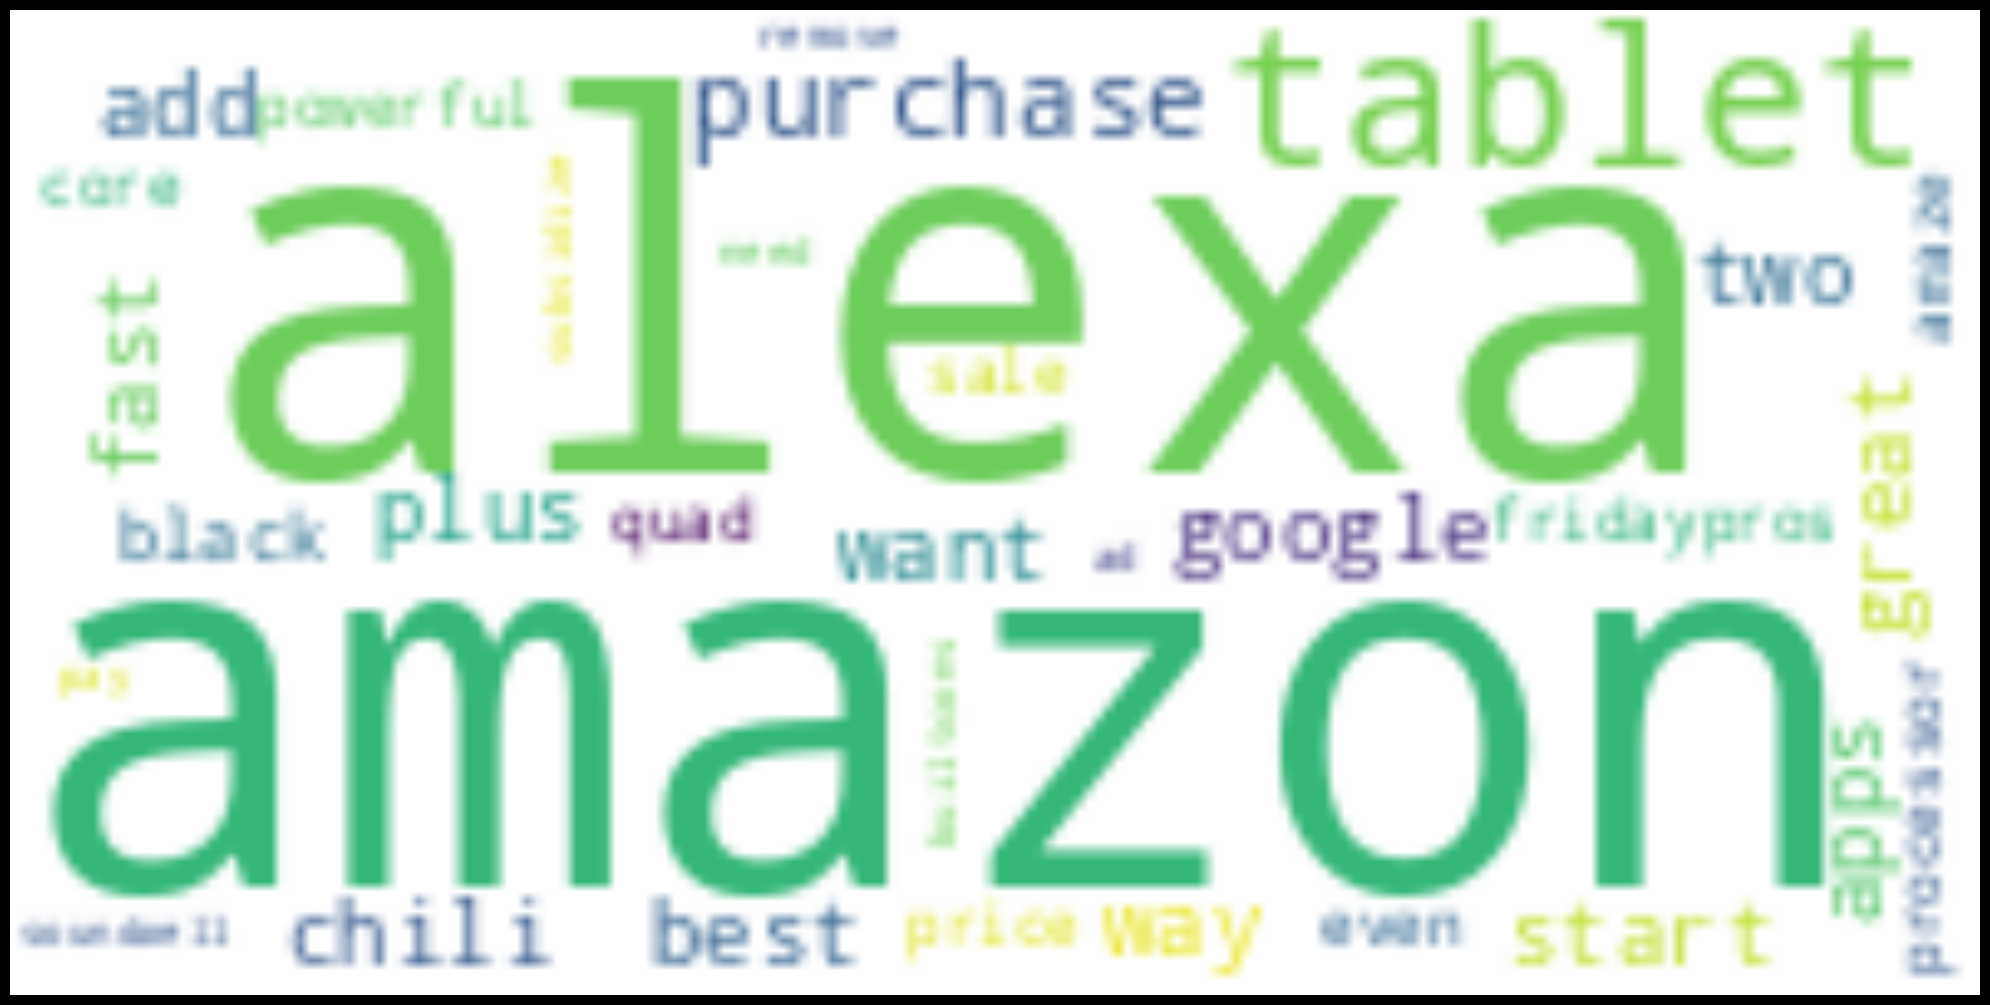

In [ ]:
# @title WORD CLOUD
from wordcloud import WordCloud, STOPWORDS
txt = Final_data["Preprocessed_Review"].values
wc = WordCloud(width=200, height=100, background_color="white", stopwords=STOPWORDS).generate(str(txt))
fig = plt.figure(figsize=(20,20), facecolor='k', edgecolor='w')
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.show()